In [5]:
import warnings
# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

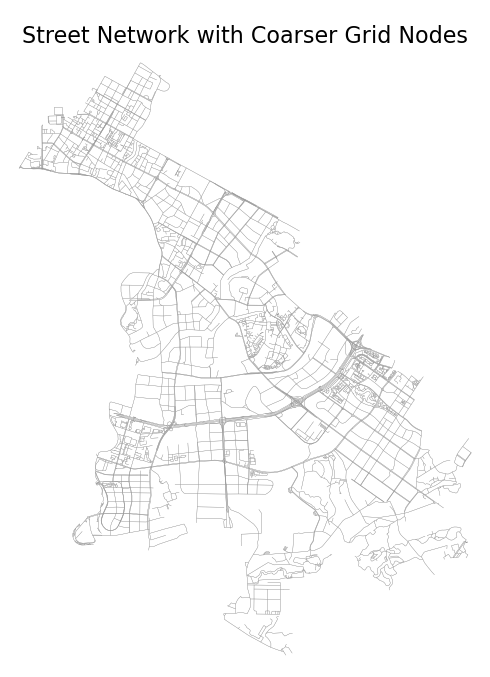

In [33]:
import osmnx as ox
import networkx as nx
import numpy as np
from shapely.geometry import Point
import matplotlib.pyplot as plt
import warnings

# Define the area of interest
place_name = "Jinjiang District, Chengdu, China"

# Load the graph from a GraphML file
G = ox.load_graphml(filepath="chengdu_network.graphml")

# Project the graph to UTM for accurate distance calculations
G_proj = ox.project_graph(G)

# Get the boundary of the specified area
boundary = ox.geocode_to_gdf(place_name).geometry[0]

# Increase grid size to reduce granularity
grid_size = 1000  # Grid size in meters (1 km)

# Get bounding box of the area
x_min, y_min, x_max, y_max = boundary.bounds

# Generate a coarser grid of points within the boundary
x_vals = np.arange(x_min, x_max, grid_size)
y_vals = np.arange(y_min, y_max, grid_size)

# Create grid points within the boundary
grid_points = [Point(x, y) for x in x_vals for y in y_vals if boundary.contains(Point(x, y))]

# Snap grid points to the nearest network nodes
grid_nodes = [ox.nearest_nodes(G_proj, point.x, point.y) for point in grid_points]

# Plot the graph with customized settings
fig, ax = ox.plot_graph(
    G_proj,
    node_size=0,
    edge_color='#999999',
    edge_linewidth=0.2,
    bgcolor='white',
    show=False,
    close=False
)

# Plot the grid nodes on top of the graph
x_coords = [G_proj.nodes[node]['x'] for node in grid_nodes]
y_coords = [G_proj.nodes[node]['y'] for node in grid_nodes]

ax.set_title("Street Network with Coarser Grid Nodes", fontsize=16)

# Show the final plot
plt.show()

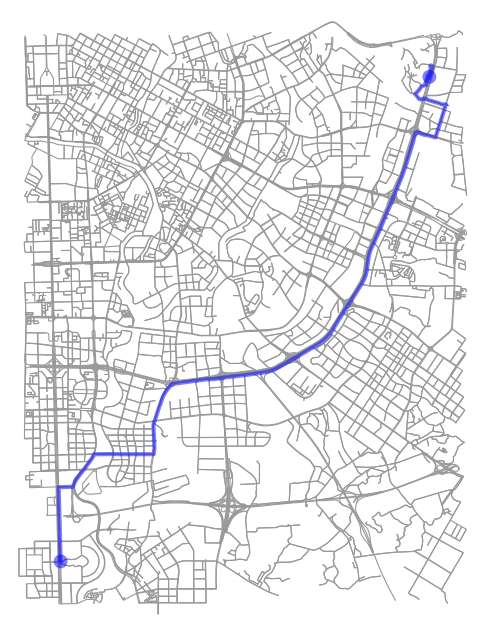

In [45]:
import osmnx as ox
import networkx as nx
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

# Define the area of interest using the bounding box (bbox)
bbox = (30.5493864, 104.057658, 30.6724752, 104.1682525)

# Load the street network within the bounding box
G = ox.graph_from_bbox(north=bbox[2], south=bbox[0], east=bbox[3], west=bbox[1], network_type='drive')

# Define starting and ending points (ensure they're different)
orig_point = (30.5593864, 104.067658)  # Near the bottom-left of bbox
dest_point = (30.6624752, 104.1582525)  # Near the top-right of bbox

# Find the nearest network nodes to the origin and destination points
orig_node = ox.nearest_nodes(G, orig_point[1], orig_point[0])
dest_node = ox.nearest_nodes(G, dest_point[1], dest_point[0])

# Compute the shortest path avoiding penalized edges
if orig_node != dest_node:
    route = nx.shortest_path(G, orig_node, dest_node, weight='length')

    # Plot the route on the graph
    fig, ax = ox.plot_graph_route(
        G,
        route,
        node_size=0,
        edge_color='#999999',
        edge_linewidth=0.8,
        route_color='blue',
        route_linewidth=3,
        bgcolor='white'
    )
else:
    print("Origin and destination nodes are the same; please choose different coordinates.")


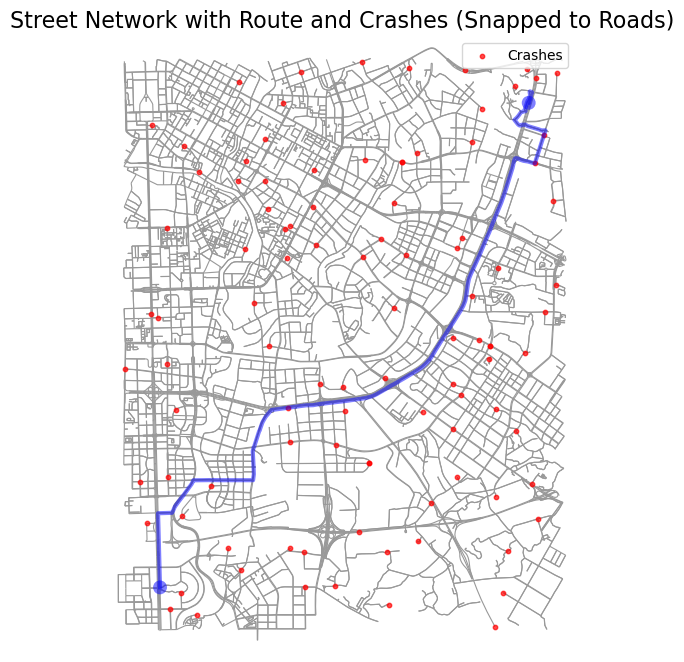

In [46]:
import osmnx as ox
import networkx as nx
import numpy as np
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Define the area of interest using the bounding box (bbox)
bbox = (30.5493864, 104.057658, 30.6724752, 104.1682525)

# Load the street network within the bounding box
G = ox.graph_from_bbox(north=bbox[2], south=bbox[0], east=bbox[3], west=bbox[1], network_type='drive')

# Define starting and ending points (ensure they're different)
orig_point = (30.5593864, 104.067658)  # Near the bottom-left of bbox
dest_point = (30.6624752, 104.1582525)  # Near the top-right of bbox

# Find the nearest network nodes to the origin and destination points
orig_node = ox.nearest_nodes(G, orig_point[1], orig_point[0])
dest_node = ox.nearest_nodes(G, dest_point[1], dest_point[0])

# Compute the shortest path avoiding penalized edges
if orig_node != dest_node:
    route = nx.shortest_path(G, orig_node, dest_node, weight='length')

    # Generate random crash points within the bounding box
    num_crashes = 100
    crash_lats = np.random.uniform(bbox[0], bbox[2], num_crashes)
    crash_lons = np.random.uniform(bbox[1], bbox[3], num_crashes)

    # Create a list of crash points as (lat, lon)
    crash_points = [(lat, lon) for lat, lon in zip(crash_lats, crash_lons)]

    # Snap crash points to the nearest network nodes
    crash_nodes = [ox.nearest_nodes(G, lon, lat) for lat, lon in crash_points]

    # Get coordinates of snapped crash nodes
    crash_x = [G.nodes[node]['x'] for node in crash_nodes]
    crash_y = [G.nodes[node]['y'] for node in crash_nodes]

    # Plot the graph and route
    fig, ax = ox.plot_graph_route(
        G,
        route,
        node_size=0,
        edge_color='#999999',
        edge_linewidth=0.8,
        route_color='blue',
        route_linewidth=3,
        bgcolor='white',
        show=False,
        close=False
    )

    # Overlay crash points snapped to the network
    ax.scatter(crash_x, crash_y, c='red', s=10, alpha=0.7, label='Crashes')

    # Set title and show legend
    ax.set_title("Street Network with Route and Crashes (Snapped to Roads)", fontsize=16)
    ax.legend(loc='upper right')

    # Show the final plot
    plt.show()

else:
    print("Origin and destination nodes are the same; please choose different coordinates.")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


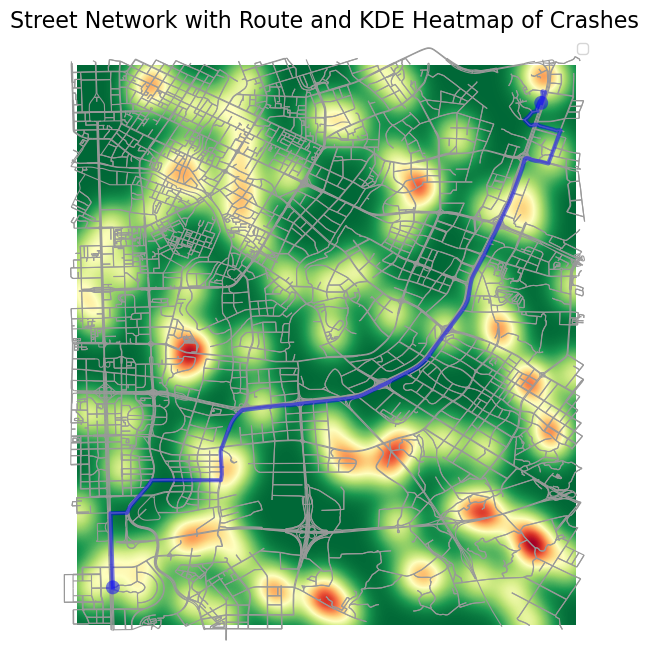

In [60]:
import osmnx as ox
import networkx as nx
import numpy as np
from shapely.geometry import Point
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
np.random.seed(42)

# Define the area of interest using the bounding box (bbox)
bbox = (30.5493864, 104.057658, 30.6724752, 104.1682525)

# Load the street network within the bounding box
G = ox.graph_from_bbox(north=bbox[2], south=bbox[0], east=bbox[3], west=bbox[1], network_type='drive')

# Define starting and ending points (ensure they're different)
orig_point = (30.5593864, 104.067658)  # Near the bottom-left of bbox
dest_point = (30.6624752, 104.1582525)  # Near the top-right of bbox

# Find the nearest network nodes to the origin and destination points
orig_node = ox.nearest_nodes(G, orig_point[1], orig_point[0])
dest_node = ox.nearest_nodes(G, dest_point[1], dest_point[0])

# Compute the shortest path avoiding penalized edges
if orig_node != dest_node:
    route = nx.shortest_path(G, orig_node, dest_node, weight='length')

    # Generate random crash points within the bounding box
    num_crashes = 100
    crash_lats = np.random.uniform(bbox[0], bbox[2], num_crashes)
    crash_lons = np.random.uniform(bbox[1], bbox[3], num_crashes)

    # Create a list of crash points as (lat, lon)
    crash_points = [(lat, lon) for lat, lon in zip(crash_lats, crash_lons)]

    # Snap crash points to the nearest network nodes
    crash_nodes = [ox.nearest_nodes(G, lon, lat) for lat, lon in crash_points]

    # Get coordinates of snapped crash nodes
    crash_x = [G.nodes[node]['x'] for node in crash_nodes]
    crash_y = [G.nodes[node]['y'] for node in crash_nodes]

    # Apply Kernel Density Estimation (KDE)
    xy = np.vstack([crash_x, crash_y])
    kde = gaussian_kde(xy, bw_method=0.1)  # Adjust bw_method for smoother or sharper density
    x_min, x_max = min(crash_x), max(crash_x)
    y_min, y_max = min(crash_y), max(crash_y)

    # Create a grid for KDE heatmap
    x_grid = np.linspace(x_min, x_max, 500)
    y_grid = np.linspace(y_min, y_max, 500)
    X, Y = np.meshgrid(x_grid, y_grid)
    Z = kde(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

    # Plot the graph and route
    fig, ax = ox.plot_graph_route(
        G,
        route,
        node_size=0,
        edge_color='#999999',
        edge_linewidth=0.8,
        route_color='blue',
        route_linewidth=3,
        bgcolor='white',
        show=False,
        close=False
    )

    # Overlay the KDE heatmap
    ax.imshow(
        Z,
        extent=[x_min, x_max, y_min, y_max],
        origin='lower',
        cmap='RdYlGn_r',  # Green to red gradient
        alpha=1
    )

    # Overlay crash points (snapped to the network)
    # ax.scatter(crash_x, crash_y, c='red', s=10, alpha=0.7, label='Crashes')

    # Set title and show legend
    ax.set_title("Street Network with Route and KDE Heatmap of Crashes", fontsize=16)
    ax.legend(loc='upper right')

    # Show the final plot
    plt.show()

else:
    print("Origin and destination nodes are the same; please choose different coordinates.")


In [19]:
import geopandas as gpd
from shapely.geometry import LineString

# Create a LineString from the route coordinates in (longitude, latitude) format
route_coords = [(G_proj.nodes[node]['x'], G_proj.nodes[node]['y']) for node in route]
route_line = LineString(route_coords).simplify(tolerance=10)

# Create a GeoDataFrame with the LineString
route_gdf = gpd.GeoDataFrame(geometry=[route_line], crs=G_proj.graph.get('crs'))

# Transform to WGS84 if not already in WGS84
if route_gdf.crs is not None and route_gdf.crs.to_string() != 'EPSG:4326':
    route_gdf = route_gdf.to_crs(epsg=4326)

# Save to GeoJSON
route_gdf.to_file('/Users/nicholas/Desktop/map/public/optimal_route.geojson', driver='GeoJSON')

print("GeoJSON file 'optimal_route.geojson' has been saved successfully.")


GeoJSON file 'optimal_route.geojson' has been saved successfully.


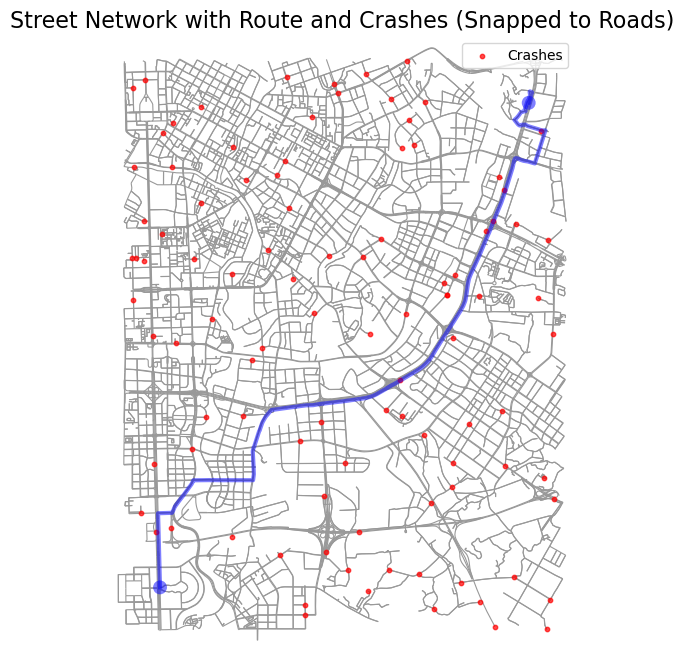

Edges with crash severity:
Edge (436884087, 3214480428, 0) has cumulative severity: 1
Edge (436912759, 7686171619, 0) has cumulative severity: 1
Edge (503861693, 7273900835, 0) has cumulative severity: 1
Edge (660131733, 11564566521, 0) has cumulative severity: 1
Edge (660131738, 8353679904, 0) has cumulative severity: 1
Edge (1159131046, 2823785843, 0) has cumulative severity: 1
Edge (1305816697, 1964418552, 0) has cumulative severity: 1
Edge (1425996106, 4637576793, 0) has cumulative severity: 1
Edge (1445528674, 11736786356, 0) has cumulative severity: 1
Edge (1469156341, 1159155384, 0) has cumulative severity: 1
Edge (1469172045, 2211339987, 0) has cumulative severity: 1
Edge (1469184059, 1469187586, 0) has cumulative severity: 1
Edge (1493095146, 7813563737, 0) has cumulative severity: 1
Edge (1819305209, 1912247131, 0) has cumulative severity: 1
Edge (2081779230, 3015893435, 0) has cumulative severity: 2
Edge (2082828900, 3028598358, 0) has cumulative severity: 1
Edge (2133206765

In [61]:
import osmnx as ox
import networkx as nx
import numpy as np
from shapely.geometry import Point
import matplotlib.pyplot as plt
from collections import defaultdict

# Define the area of interest using the bounding box (bbox)
bbox = (30.5493864, 104.057658, 30.6724752, 104.1682525)

# Load the street network within the bounding box
G = ox.graph_from_bbox(north=bbox[2], south=bbox[0], east=bbox[3], west=bbox[1], network_type='drive')

# Define starting and ending points (ensure they're different)
orig_point = (30.5593864, 104.067658)  # Near the bottom-left of bbox
dest_point = (30.6624752, 104.1582525)  # Near the top-right of bbox

# Find the nearest network nodes to the origin and destination points
orig_node = ox.nearest_nodes(G, orig_point[1], orig_point[0])
dest_node = ox.nearest_nodes(G, dest_point[1], dest_point[0])

# Compute the shortest path avoiding penalized edges
if orig_node != dest_node:
    route = nx.shortest_path(G, orig_node, dest_node, weight='length')

    # Generate random crash points within the bounding box
    num_crashes = 100
    crash_lats = np.random.uniform(bbox[0], bbox[2], num_crashes)
    crash_lons = np.random.uniform(bbox[1], bbox[3], num_crashes)

    # Create a list of crash points as (lat, lon)
    crash_points = [(lat, lon) for lat, lon in zip(crash_lats, crash_lons)]

    # Snap crash points to the nearest network nodes
    crash_nodes = [ox.nearest_nodes(G, lon, lat) for lat, lon in crash_points]

    # Get coordinates of snapped crash nodes
    crash_x = [G.nodes[node]['x'] for node in crash_nodes]
    crash_y = [G.nodes[node]['y'] for node in crash_nodes]

    # Find the nearest edge for each crash point and tally crashes to the nearest edge
    edge_crash_count = defaultdict(int)  # Dictionary to store crash counts per edge
    for lat, lon in crash_points:
        nearest_edge = ox.nearest_edges(G, lon, lat)
        edge_crash_count[nearest_edge] += 1

    # Add cumulative severity to the edges in the graph
    for u, v, key in G.edges(keys=True):
        G[u][v][key]['cumulative_severity'] = edge_crash_count.get((u, v, key), 0)

    # Plot the graph and route
    fig, ax = ox.plot_graph_route(
        G,
        route,
        node_size=0,
        edge_color='#999999',
        edge_linewidth=0.8,
        route_color='blue',
        route_linewidth=3,
        bgcolor='white',
        show=False,
        close=False
    )

    # Overlay crash points snapped to the network
    ax.scatter(crash_x, crash_y, c='red', s=10, alpha=0.7, label='Crashes')

    # Set title and show legend
    ax.set_title("Street Network with Route and Crashes (Snapped to Roads)", fontsize=16)
    ax.legend(loc='upper right')

    # Show the final plot
    plt.show()

    # Print a summary of edges with crash severity
    edge_severity_summary = [(u, v, key, data['cumulative_severity']) 
                             for u, v, key, data in G.edges(keys=True, data=True) if data['cumulative_severity'] > 0]

else:
    print("Origin and destination nodes are the same; please choose different coordinates.")


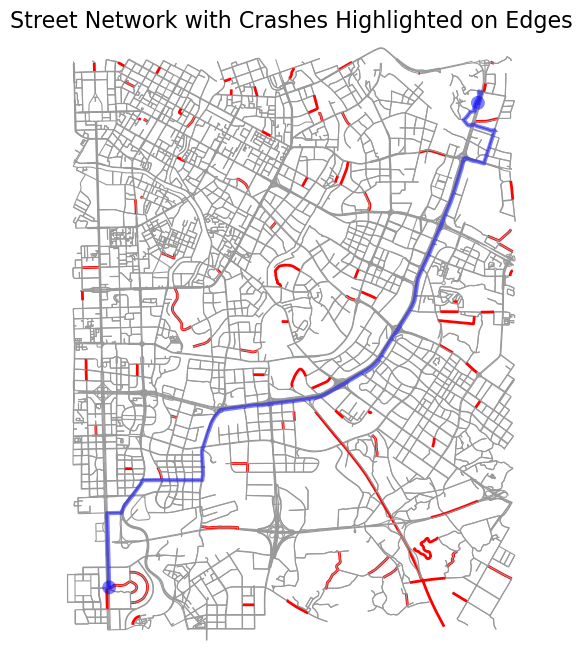

In [62]:
import osmnx as ox
import networkx as nx
import numpy as np
from shapely.geometry import Point
import matplotlib.pyplot as plt
from collections import defaultdict

# Define the area of interest using the bounding box (bbox)
bbox = (30.5493864, 104.057658, 30.6724752, 104.1682525)

# Load the street network within the bounding box
G = ox.graph_from_bbox(north=bbox[2], south=bbox[0], east=bbox[3], west=bbox[1], network_type='drive')

# Define starting and ending points (ensure they're different)
orig_point = (30.5593864, 104.067658)  # Near the bottom-left of bbox
dest_point = (30.6624752, 104.1582525)  # Near the top-right of bbox

# Find the nearest network nodes to the origin and destination points
orig_node = ox.nearest_nodes(G, orig_point[1], orig_point[0])
dest_node = ox.nearest_nodes(G, dest_point[1], dest_point[0])

# Compute the shortest path avoiding penalized edges
if orig_node != dest_node:
    route = nx.shortest_path(G, orig_node, dest_node, weight='length')

    # Generate random crash points within the bounding box
    num_crashes = 100
    crash_lats = np.random.uniform(bbox[0], bbox[2], num_crashes)
    crash_lons = np.random.uniform(bbox[1], bbox[3], num_crashes)

    # Create a list of crash points as (lat, lon)
    crash_points = [(lat, lon) for lat, lon in zip(crash_lats, crash_lons)]

    # Snap crash points to the nearest network nodes
    crash_nodes = [ox.nearest_nodes(G, lon, lat) for lat, lon in crash_points]

    # Get coordinates of snapped crash nodes
    crash_x = [G.nodes[node]['x'] for node in crash_nodes]
    crash_y = [G.nodes[node]['y'] for node in crash_nodes]

    # Find the nearest edge for each crash point and tally crashes to the nearest edge
    edge_crash_count = defaultdict(int)  # Dictionary to store crash counts per edge
    for lat, lon in crash_points:
        nearest_edge = ox.nearest_edges(G, lon, lat)
        edge_crash_count[nearest_edge] += 1

    # Add cumulative severity to the edges in the graph
    for u, v, key in G.edges(keys=True):
        G[u][v][key]['cumulative_severity'] = edge_crash_count.get((u, v, key), 0)

    # Define edge colors based on crash severity
    edge_colors = [
        'red' if G[u][v][key]['cumulative_severity'] > 0 else '#999999'  # Gray for no crashes
        for u, v, key in G.edges(keys=True)
    ]

    # Define edge widths based on crash severity
    edge_widths = [
        2 if G[u][v][key]['cumulative_severity'] > 0 else 0.8
        for u, v, key in G.edges(keys=True)
    ]

    # Plot the graph with customized edge colors and widths
    fig, ax = ox.plot_graph(
        G,
        node_size=0,
        edge_color=edge_colors,
        edge_linewidth=edge_widths,
        bgcolor='white',
        show=False,
        close=False
    )

    # Plot the route on top
    ox.plot_graph_route(
        G,
        route,
        route_color='blue',
        route_linewidth=3,
        node_size=0,
        bgcolor=None,
        ax=ax,
        show=False,
        close=False
    )

    # Set the title
    ax.set_title("Street Network with Crashes Highlighted on Edges", fontsize=16)

    # Show the final plot
    plt.show()

else:
    print("Origin and destination nodes are the same; please choose different coordinates.")


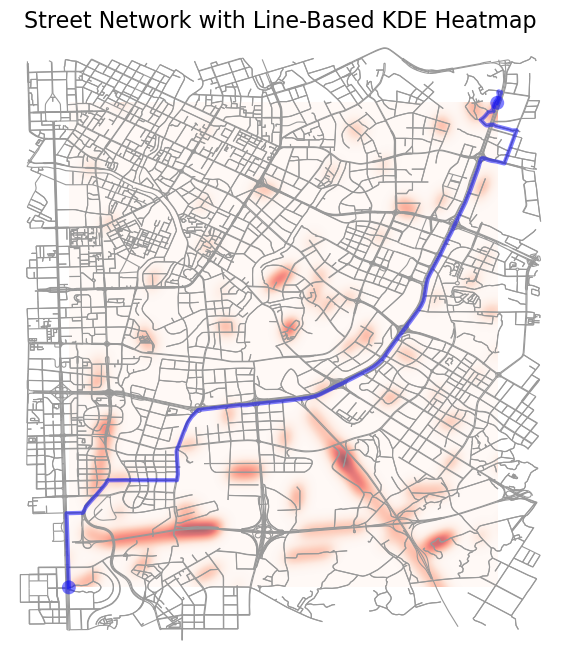

In [63]:
import osmnx as ox
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Define the area of interest using the bounding box (bbox)
bbox = (30.5493864, 104.057658, 30.6724752, 104.1682525)

# Load the street network within the bounding box
G = ox.graph_from_bbox(north=bbox[2], south=bbox[0], east=bbox[3], west=bbox[1], network_type='drive')

# Define starting and ending points (ensure they're different)
orig_point = (30.5593864, 104.067658)  # Near the bottom-left of bbox
dest_point = (30.6624752, 104.1582525)  # Near the top-right of bbox

# Find the nearest network nodes to the origin and destination points
orig_node = ox.nearest_nodes(G, orig_point[1], orig_point[0])
dest_node = ox.nearest_nodes(G, dest_point[1], dest_point[0])

# Compute the shortest path avoiding penalized edges
if orig_node != dest_node:
    route = nx.shortest_path(G, orig_node, dest_node, weight='length')

    # Generate random crash points within the bounding box
    num_crashes = 100
    crash_lats = np.random.uniform(bbox[0], bbox[2], num_crashes)
    crash_lons = np.random.uniform(bbox[1], bbox[3], num_crashes)

    # Create a list of crash points as (lat, lon)
    crash_points = [(lat, lon) for lat, lon in zip(crash_lats, crash_lons)]

    # Snap crash points to the nearest network nodes
    crash_nodes = [ox.nearest_nodes(G, lon, lat) for lat, lon in crash_points]

    # Get coordinates of snapped crash nodes
    crash_x = [G.nodes[node]['x'] for node in crash_nodes]
    crash_y = [G.nodes[node]['y'] for node in crash_nodes]

    # Find the nearest edge for each crash point and tally crashes to the nearest edge
    edge_crash_count = defaultdict(int)  # Dictionary to store crash counts per edge
    for lat, lon in crash_points:
        nearest_edge = ox.nearest_edges(G, lon, lat)
        edge_crash_count[nearest_edge] += 1

    # Add cumulative severity to the edges in the graph
    for u, v, key in G.edges(keys=True):
        G[u][v][key]['cumulative_severity'] = edge_crash_count.get((u, v, key), 0)

    # Create points along edges with crash severity for the heatmap
    line_points = []
    for u, v, key, data in G.edges(keys=True, data=True):
        if data['cumulative_severity'] > 0:
            # Get the coordinates of the edge endpoints
            x_start, y_start = G.nodes[u]['x'], G.nodes[u]['y']
            x_end, y_end = G.nodes[v]['x'], G.nodes[v]['y']

            # Calculate the number of intermediate points based on the edge length
            num_points = max(int(data['length'] / 10), 2)  # At least 2 points, more for longer edges
            x_vals = np.linspace(x_start, x_end, num_points)
            y_vals = np.linspace(y_start, y_end, num_points)

            # Add the intermediate points to the list, weighted by crash severity
            line_points.extend([(x, y) for x, y in zip(x_vals, y_vals)])

    # Apply Kernel Density Estimation (KDE) to line points
    line_points = np.array(line_points).T
    kde = gaussian_kde(line_points, bw_method=0.05)  # Adjust bw_method for smoother or sharper density
    x_min, x_max = G.nodes[orig_node]['x'], G.nodes[dest_node]['x']
    y_min, y_max = G.nodes[orig_node]['y'], G.nodes[dest_node]['y']

    # Create a grid for the KDE heatmap
    x_grid = np.linspace(x_min, x_max, 500)
    y_grid = np.linspace(y_min, y_max, 500)
    X, Y = np.meshgrid(x_grid, y_grid)
    Z = kde(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

    # Plot the graph with KDE heatmap
    fig, ax = ox.plot_graph(
        G,
        node_size=0,
        edge_color='#999999',
        edge_linewidth=0.8,
        bgcolor='white',
        show=False,
        close=False
    )

    # Overlay the KDE heatmap
    ax.imshow(
        Z,
        extent=[x_min, x_max, y_min, y_max],
        origin='lower',
        cmap='Reds',  # White to red gradient
        alpha=0.6
    )

    # Plot the route on top
    ox.plot_graph_route(
        G,
        route,
        route_color='blue',
        route_linewidth=3,
        node_size=0,
        bgcolor=None,
        ax=ax,
        show=False,
        close=False
    )

    # Set the title
    ax.set_title("Street Network with Line-Based KDE Heatmap", fontsize=16)

    # Show the final plot
    plt.show()

else:
    print("Origin and destination nodes are the same; please choose different coordinates.")


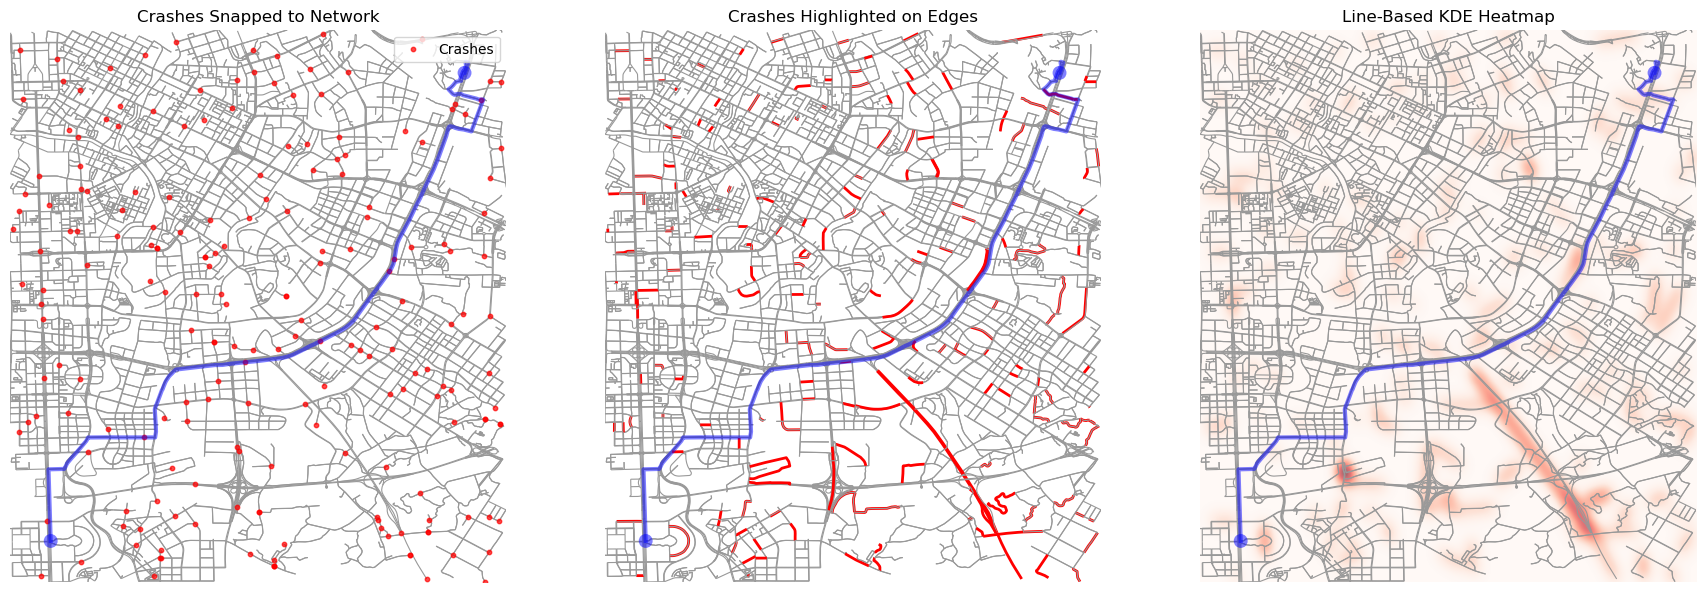

In [69]:
import osmnx as ox
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
from collections import defaultdict
from scipy.stats import gaussian_kde

# Define the area of interest using the bounding box (bbox)
bbox = (30.5493864, 104.057658, 30.6724752, 104.1682525)

# Load the street network within the bounding box
G = ox.graph_from_bbox(
    north=bbox[2], south=bbox[0], east=bbox[3], west=bbox[1], network_type='drive'
)

# Define starting and ending points (ensure they're different)
orig_point = (30.5593864, 104.067658)  # Near the bottom-left of bbox
dest_point = (30.6624752, 104.1582525)  # Near the top-right of bbox

# Find the nearest network nodes to the origin and destination points
orig_node = ox.nearest_nodes(G, orig_point[1], orig_point[0])
dest_node = ox.nearest_nodes(G, dest_point[1], dest_point[0])

# Compute the shortest path
if orig_node != dest_node:
    route = nx.shortest_path(G, orig_node, dest_node, weight='length')

    # Generate random crash points within the bounding box
    num_crashes = 200
    crash_lats = np.random.uniform(bbox[0], bbox[2], num_crashes)
    crash_lons = np.random.uniform(bbox[1], bbox[3], num_crashes)

    # Create a list of crash points as (lat, lon)
    crash_points = list(zip(crash_lats, crash_lons))

    # Snap crash points to the nearest network nodes
    crash_nodes = [ox.nearest_nodes(G, lon, lat) for lat, lon in crash_points]

    # Get coordinates of snapped crash nodes
    crash_x = [G.nodes[node]['x'] for node in crash_nodes]
    crash_y = [G.nodes[node]['y'] for node in crash_nodes]

    # Find the nearest edge for each crash point and tally crashes to the nearest edge
    edge_crash_count = defaultdict(int)
    for lat, lon in crash_points:
        nearest_edge = ox.nearest_edges(G, lon, lat)
        edge_crash_count[nearest_edge] += 1

    # Add cumulative severity to the edges in the graph
    for u, v, key in G.edges(keys=True):
        G[u][v][key]['cumulative_severity'] = edge_crash_count.get((u, v, key), 0)

    # Prepare edge colors and widths for plotting
    edge_colors = []
    edge_widths = []
    for u, v, key in G.edges(keys=True):
        severity = G[u][v][key]['cumulative_severity']
        if severity > 0:
            edge_colors.append('red')
            edge_widths.append(2)
        else:
            edge_colors.append('#999999')
            edge_widths.append(0.8)

    # Create points along edges with crash severity for the heatmap
    line_points = []
    for u, v, key, data in G.edges(keys=True, data=True):
        if data['cumulative_severity'] > 0:
            x_start, y_start = G.nodes[u]['x'], G.nodes[u]['y']
            x_end, y_end = G.nodes[v]['x'], G.nodes[v]['y']
            num_points = max(int(data['length'] / 10), 2)
            x_vals = np.linspace(x_start, x_end, num_points)
            y_vals = np.linspace(y_start, y_end, num_points)
            line_points.extend([(x, y) for x, y in zip(x_vals, y_vals)])

    # Apply Kernel Density Estimation (KDE) to line points
    if line_points:
        line_points = np.array(line_points).T
        kde = gaussian_kde(line_points, bw_method=0.05)
        x_coords = [G.nodes[node]['x'] for node in G.nodes()]
        y_coords = [G.nodes[node]['y'] for node in G.nodes()]
        x_min, x_max = min(x_coords), max(x_coords)
        y_min, y_max = min(y_coords), max(y_coords)
        x_grid = np.linspace(x_min, x_max, 500)
        y_grid = np.linspace(y_min, y_max, 500)
        X_grid, Y_grid = np.meshgrid(x_grid, y_grid)
        Z = kde(np.vstack([X_grid.ravel(), Y_grid.ravel()])).reshape(X_grid.shape)
    else:
        Z = None

    # Create a figure with 3 subplots
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    # First subplot: Street Network with Route and Crashes
    # Plot the street network
    ox.plot_graph(
        G,
        node_size=0,
        edge_color='#999999',
        edge_linewidth=0.8,
        bgcolor='white',
        show=False,
        close=False,
        ax=axs[0]
    )
    # Overlay the route
    ox.plot_graph_route(
        G,
        route,
        route_color='blue',
        route_linewidth=3,
        node_size=0,
        bgcolor=None,
        ax=axs[0],
        show=False,
        close=False
    )
    # Overlay crash points snapped to the network
    axs[0].scatter(crash_x, crash_y, c='red', s=10, alpha=0.7, label='Crashes')
    axs[0].set_title("Crashes Snapped to Network", fontsize=12)
    axs[0].legend(loc='upper right')

    # Second subplot: Street Network with Crashes Highlighted on Edges
    ox.plot_graph(
        G,
        node_size=0,
        edge_color=edge_colors,
        edge_linewidth=edge_widths,
        bgcolor='white',
        show=False,
        close=False,
        ax=axs[1]
    )
    # Plot the route on top
    ox.plot_graph_route(
        G,
        route,
        route_color='blue',
        route_linewidth=3,
        node_size=0,
        bgcolor=None,
        ax=axs[1],
        show=False,
        close=False
    )
    axs[1].set_title("Crashes Highlighted on Edges", fontsize=12)

    # Third subplot: Street Network with Line-Based KDE Heatmap
    ox.plot_graph(
        G,
        node_size=0,
        edge_color='#999999',
        edge_linewidth=0.8,
        bgcolor='white',
        show=False,
        close=False,
        ax=axs[2]
    )

    if Z is not None:
        axs[2].imshow(
            np.flipud(Z),
            extent=[x_min, x_max, y_min, y_max],
            cmap='Reds',
            alpha=0.6
        )
    # Plot the route on top
    ox.plot_graph_route(
        G,
        route,
        route_color='blue',
        route_linewidth=3,
        node_size=0,
        bgcolor=None,
        ax=axs[2],
        show=False,
        close=False
    )
    axs[2].set_title("Line-Based KDE Heatmap", fontsize=12)

    # Set the same x and y limits and aspect ratio for all subplots
    for ax in axs:
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_aspect('equal')

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

else:
    print("Origin and destination nodes are the same; please choose different coordinates.")

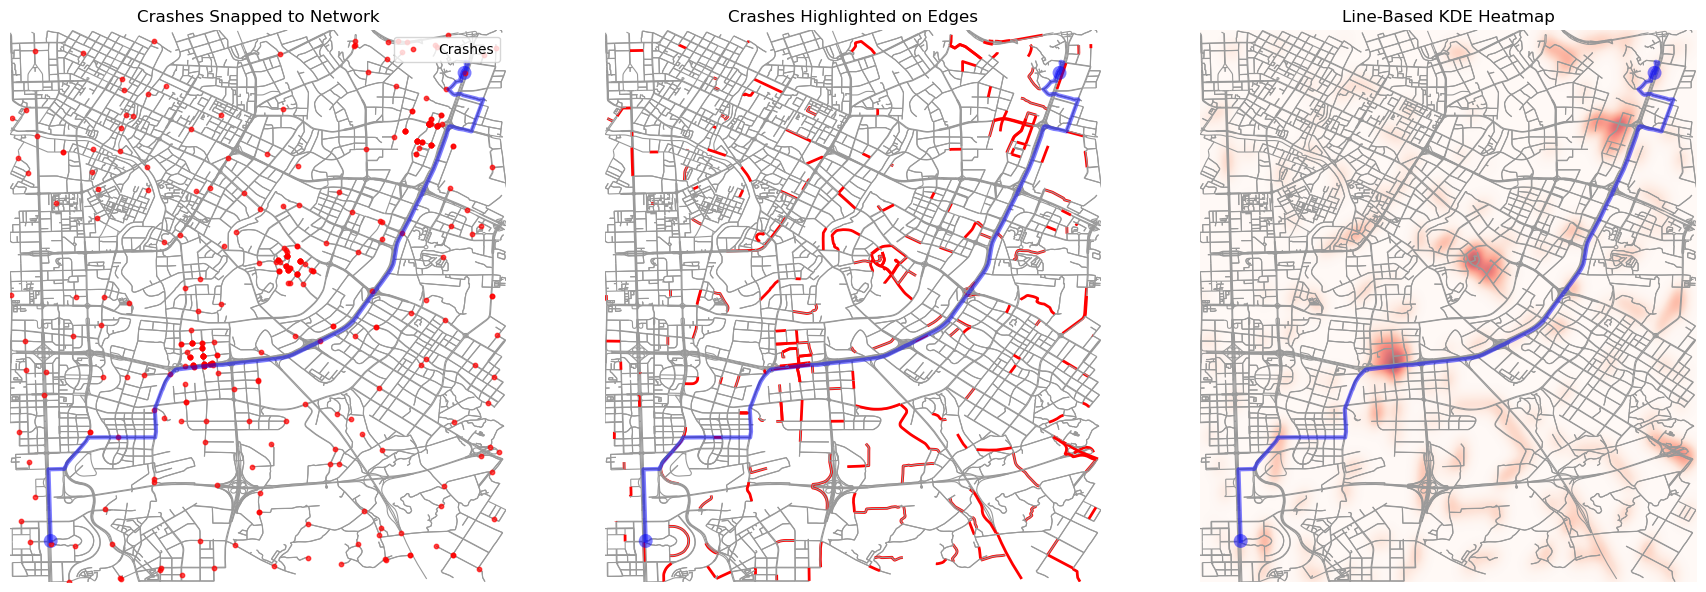

In [70]:
import osmnx as ox
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
from collections import defaultdict
from scipy.stats import gaussian_kde

# Define the area of interest using the bounding box (bbox)
bbox = (30.5493864, 104.057658, 30.6724752, 104.1682525)

# Load the street network within the bounding box
G = ox.graph_from_bbox(
    north=bbox[2], south=bbox[0], east=bbox[3], west=bbox[1], network_type='drive'
)

# Define starting and ending points (ensure they're different)
orig_point = (30.5593864, 104.067658)  # Near the bottom-left of bbox
dest_point = (30.6624752, 104.1582525)  # Near the top-right of bbox

# Find the nearest network nodes to the origin and destination points
orig_node = ox.nearest_nodes(G, orig_point[1], orig_point[0])
dest_node = ox.nearest_nodes(G, dest_point[1], dest_point[0])

# Compute the shortest path
if orig_node != dest_node:
    route = nx.shortest_path(G, orig_node, dest_node, weight='length')

    # Generate 200 random crash points within the bounding box
    num_random_crashes = 200
    random_crash_lats = np.random.uniform(bbox[0], bbox[2], num_random_crashes)
    random_crash_lons = np.random.uniform(bbox[1], bbox[3], num_random_crashes)
    random_crash_points = list(zip(random_crash_lats, random_crash_lons))

    # Generate 3 clusters of 50 crash points each
    cluster_centers = [
        (30.6, 104.1),
        (30.62, 104.12),
        (30.65, 104.15)
    ]
    num_clusters = 3
    points_per_cluster = 50
    std_dev = 0.002  # Standard deviation for clusters (~200 meters)
    cluster_crash_points = []

    for center_lat, center_lon in cluster_centers:
        cluster_lats = np.random.normal(center_lat, std_dev, points_per_cluster)
        cluster_lons = np.random.normal(center_lon, std_dev, points_per_cluster)
        cluster_points = list(zip(cluster_lats, cluster_lons))
        cluster_crash_points.extend(cluster_points)

    # Combine random crashes and cluster crashes
    crash_points = random_crash_points + cluster_crash_points

    # Total number of crashes
    total_crashes = num_random_crashes + num_clusters * points_per_cluster

    # Snap crash points to the nearest network nodes
    crash_nodes = [ox.nearest_nodes(G, lon, lat) for lat, lon in crash_points]

    # Get coordinates of snapped crash nodes
    crash_x = [G.nodes[node]['x'] for node in crash_nodes]
    crash_y = [G.nodes[node]['y'] for node in crash_nodes]

    # Find the nearest edge for each crash point and tally crashes to the nearest edge
    edge_crash_count = defaultdict(int)
    for lat, lon in crash_points:
        nearest_edge = ox.nearest_edges(G, lon, lat)
        edge_crash_count[nearest_edge] += 1

    # Add cumulative severity to the edges in the graph
    for u, v, key in G.edges(keys=True):
        G[u][v][key]['cumulative_severity'] = edge_crash_count.get((u, v, key), 0)

    # Prepare edge colors and widths for plotting
    edge_colors = []
    edge_widths = []
    for u, v, key in G.edges(keys=True):
        severity = G[u][v][key]['cumulative_severity']
        if severity > 0:
            edge_colors.append('red')
            edge_widths.append(2)
        else:
            edge_colors.append('#999999')
            edge_widths.append(0.8)

    # Create points along edges with crash severity for the heatmap
    line_points = []
    for u, v, key, data in G.edges(keys=True, data=True):
        if data['cumulative_severity'] > 0:
            x_start, y_start = G.nodes[u]['x'], G.nodes[u]['y']
            x_end, y_end = G.nodes[v]['x'], G.nodes[v]['y']
            num_points = max(int(data['length'] / 10), 2)
            x_vals = np.linspace(x_start, x_end, num_points)
            y_vals = np.linspace(y_start, y_end, num_points)
            line_points.extend([(x, y) for x, y in zip(x_vals, y_vals)])

    # Apply Kernel Density Estimation (KDE) to line points
    if line_points:
        line_points = np.array(line_points).T
        kde = gaussian_kde(line_points, bw_method=0.05)
        x_coords = [G.nodes[node]['x'] for node in G.nodes()]
        y_coords = [G.nodes[node]['y'] for node in G.nodes()]
        x_min, x_max = min(x_coords), max(x_coords)
        y_min, y_max = min(y_coords), max(y_coords)
        x_grid = np.linspace(x_min, x_max, 500)
        y_grid = np.linspace(y_min, y_max, 500)
        X_grid, Y_grid = np.meshgrid(x_grid, y_grid)
        Z = kde(np.vstack([X_grid.ravel(), Y_grid.ravel()])).reshape(X_grid.shape)
    else:
        Z = None

    # Create a figure with 3 subplots
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    # First subplot: Street Network with Route and Crashes
    # Plot the street network
    ox.plot_graph(
        G,
        node_size=0,
        edge_color='#999999',
        edge_linewidth=0.8,
        bgcolor='white',
        show=False,
        close=False,
        ax=axs[0]
    )
    # Overlay the route
    ox.plot_graph_route(
        G,
        route,
        route_color='blue',
        route_linewidth=3,
        node_size=0,
        bgcolor=None,
        ax=axs[0],
        show=False,
        close=False
    )
    # Overlay crash points snapped to the network
    axs[0].scatter(crash_x, crash_y, c='red', s=10, alpha=0.7, label='Crashes')
    axs[0].set_title("Crashes Snapped to Network", fontsize=12)
    axs[0].legend(loc='upper right')

    # Second subplot: Street Network with Crashes Highlighted on Edges
    ox.plot_graph(
        G,
        node_size=0,
        edge_color=edge_colors,
        edge_linewidth=edge_widths,
        bgcolor='white',
        show=False,
        close=False,
        ax=axs[1]
    )
    # Plot the route on top
    ox.plot_graph_route(
        G,
        route,
        route_color='blue',
        route_linewidth=3,
        node_size=0,
        bgcolor=None,
        ax=axs[1],
        show=False,
        close=False
    )
    axs[1].set_title("Crashes Highlighted on Edges", fontsize=12)

    # Third subplot: Street Network with Line-Based KDE Heatmap
    ox.plot_graph(
        G,
        node_size=0,
        edge_color='#999999',
        edge_linewidth=0.8,
        bgcolor='white',
        show=False,
        close=False,
        ax=axs[2]
    )

    if Z is not None:
        axs[2].imshow(
            np.flipud(Z),
            extent=[x_min, x_max, y_min, y_max],
            cmap='Reds',
            alpha=0.6
        )
    # Plot the route on top
    ox.plot_graph_route(
        G,
        route,
        route_color='blue',
        route_linewidth=3,
        node_size=0,
        bgcolor=None,
        ax=axs[2],
        show=False,
        close=False
    )
    axs[2].set_title("Line-Based KDE Heatmap", fontsize=12)

    # Set the same x and y limits and aspect ratio for all subplots
    for ax in axs:
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_aspect('equal')

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

else:
    print("Origin and destination nodes are the same; please choose different coordinates.")

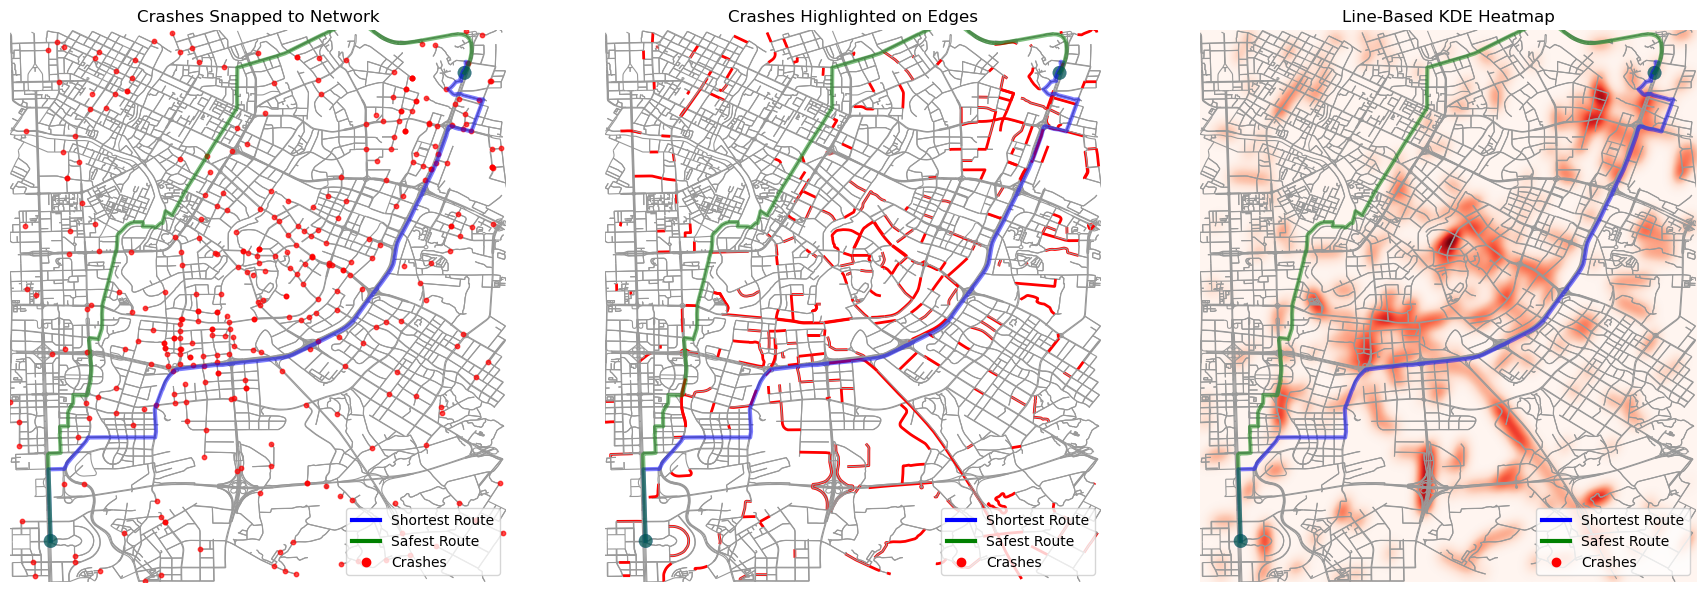

In [77]:
import osmnx as ox
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
from collections import defaultdict
from scipy.stats import gaussian_kde
np.random.seed(12)

# Define the area of interest using the bounding box (bbox)
bbox = (30.5493864, 104.057658, 30.6724752, 104.1682525)

# Load the street network within the bounding box
G = ox.graph_from_bbox(
    north=bbox[2], south=bbox[0], east=bbox[3], west=bbox[1], network_type='drive'
)

# Define starting and ending points (ensure they're different)
orig_point = (30.5593864, 104.067658)  # Near the bottom-left of bbox
dest_point = (30.6624752, 104.1582525)  # Near the top-right of bbox

# Find the nearest network nodes to the origin and destination points
orig_node = ox.nearest_nodes(G, orig_point[1], orig_point[0])
dest_node = ox.nearest_nodes(G, dest_point[1], dest_point[0])

# Compute the shortest path (without considering crashes)
if orig_node != dest_node:
    shortest_route = nx.shortest_path(G, orig_node, dest_node, weight='length')

    # Generate 200 random crash points within the bounding box
    num_random_crashes = 200
    random_crash_lats = np.random.uniform(bbox[0], bbox[2], num_random_crashes)
    random_crash_lons = np.random.uniform(bbox[1], bbox[3], num_random_crashes)
    random_crash_points = list(zip(random_crash_lats, random_crash_lons))

    # Generate 3 clusters of 50 crash points each
    cluster_centers = [
        (30.6, 104.1),
        (30.62, 104.12),
        (30.65, 104.15)
    ]
    num_clusters = 4
    points_per_cluster = 50
    std_dev = 0.008  # Standard deviation for clusters (~200 meters)
    cluster_crash_points = []

    for center_lat, center_lon in cluster_centers:
        cluster_lats = np.random.normal(center_lat, std_dev, points_per_cluster)
        cluster_lons = np.random.normal(center_lon, std_dev, points_per_cluster)
        cluster_points = list(zip(cluster_lats, cluster_lons))
        cluster_crash_points.extend(cluster_points)

    # Combine random crashes and cluster crashes
    crash_points = random_crash_points + cluster_crash_points

    # Total number of crashes
    total_crashes = num_random_crashes + num_clusters * points_per_cluster

    # Snap crash points to the nearest network nodes
    crash_nodes = [ox.nearest_nodes(G, lon, lat) for lat, lon in crash_points]

    # Get coordinates of snapped crash nodes
    crash_x = [G.nodes[node]['x'] for node in crash_nodes]
    crash_y = [G.nodes[node]['y'] for node in crash_nodes]

    # Find the nearest edge for each crash point and tally crashes to the nearest edge
    edge_crash_count = defaultdict(int)
    for lat, lon in crash_points:
        nearest_edge = ox.nearest_edges(G, lon, lat)
        edge_crash_count[nearest_edge] += 1

    # Add cumulative severity to the edges in the graph
    for u, v, key in G.edges(keys=True):
        G[u][v][key]['cumulative_severity'] = edge_crash_count.get((u, v, key), 0)

    # Prepare edge colors and widths for plotting
    edge_colors = []
    edge_widths = []
    for u, v, key in G.edges(keys=True):
        severity = G[u][v][key]['cumulative_severity']
        if severity > 0:
            edge_colors.append('red')
            edge_widths.append(2)
        else:
            edge_colors.append('#999999')
            edge_widths.append(0.8)

    # Create points along edges with crash severity for the heatmap
    line_points = []
    for u, v, key, data in G.edges(keys=True, data=True):
        if data['cumulative_severity'] > 0:
            x_start, y_start = G.nodes[u]['x'], G.nodes[u]['y']
            x_end, y_end = G.nodes[v]['x'], G.nodes[v]['y']
            num_points = max(int(data['length'] / 10), 2)
            x_vals = np.linspace(x_start, x_end, num_points)
            y_vals = np.linspace(y_start, y_end, num_points)
            line_points.extend([(x, y) for x, y in zip(x_vals, y_vals)])

    # Apply Kernel Density Estimation (KDE) to line points
    if line_points:
        line_points = np.array(line_points).T
        kde = gaussian_kde(line_points, bw_method=0.05)
        x_coords = [G.nodes[node]['x'] for node in G.nodes()]
        y_coords = [G.nodes[node]['y'] for node in G.nodes()]
        x_min, x_max = min(x_coords), max(x_coords)
        y_min, y_max = min(y_coords), max(y_coords)
        x_grid = np.linspace(x_min, x_max, 500)
        y_grid = np.linspace(y_min, y_max, 500)
        X_grid, Y_grid = np.meshgrid(x_grid, y_grid)
        Z = kde(np.vstack([X_grid.ravel(), Y_grid.ravel()])).reshape(X_grid.shape)
    else:
        Z = None

    # Compute the safest route by penalizing edges with crashes
    # Define a penalty factor for crashes
    penalty_factor = 100  # Adjust this factor to increase or decrease the penalty severity

    # Add a new attribute 'safety_weight' to each edge
    for u, v, key, data in G.edges(keys=True, data=True):
        severity = data['cumulative_severity']
        # Calculate the safety weight
        data['safety_weight'] = data['length'] * (1 + penalty_factor * severity)

    # Compute the safest route using the 'safety_weight' attribute
    safest_route = nx.shortest_path(G, orig_node, dest_node, weight='safety_weight')

    # Create a figure with 3 subplots
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    # First subplot: Street Network with Route and Crashes
    # Plot the street network
    ox.plot_graph(
        G,
        node_size=0,
        edge_color='#999999',
        edge_linewidth=0.8,
        bgcolor='white',
        show=False,
        close=False,
        ax=axs[0]
    )
    # Overlay the shortest route
    ox.plot_graph_route(
        G,
        shortest_route,
        route_color='blue',
        route_linewidth=3,
        node_size=0,
        bgcolor=None,
        ax=axs[0],
        show=False,
        close=False
    )
    # Overlay the safest route
    ox.plot_graph_route(
        G,
        safest_route,
        route_color='green',
        route_linewidth=3,
        node_size=0,
        bgcolor=None,
        ax=axs[0],
        show=False,
        close=False
    )
    # Overlay crash points snapped to the network
    axs[0].scatter(crash_x, crash_y, c='red', s=10, alpha=1, label='Crashes')
    axs[0].set_title("Crashes Snapped to Network", fontsize=12)
    axs[0].legend(loc='upper right')

    # Second subplot: Street Network with Crashes Highlighted on Edges
    ox.plot_graph(
        G,
        node_size=0,
        edge_color=edge_colors,
        edge_linewidth=edge_widths,
        bgcolor='white',
        show=False,
        close=False,
        ax=axs[1]
    )
    # Plot the shortest route on top
    ox.plot_graph_route(
        G,
        shortest_route,
        route_color='blue',
        route_linewidth=3,
        node_size=0,
        bgcolor=None,
        ax=axs[1],
        show=False,
        close=False
    )
    # Plot the safest route on top
    ox.plot_graph_route(
        G,
        safest_route,
        route_color='green',
        route_linewidth=3,
        node_size=0,
        bgcolor=None,
        ax=axs[1],
        show=False,
        close=False
    )
    axs[1].set_title("Crashes Highlighted on Edges", fontsize=12)

    # Third subplot: Street Network with Line-Based KDE Heatmap
    ox.plot_graph(
        G,
        node_size=0,
        edge_color='#999999',
        edge_linewidth=0.8,
        bgcolor='white',
        show=False,
        close=False,
        ax=axs[2]
    )

    if Z is not None:
        axs[2].imshow(
            np.flipud(Z),
            extent=[x_min, x_max, y_min, y_max],
            cmap='Reds',
            alpha=1
        )
    # Plot the shortest route on top
    ox.plot_graph_route(
        G,
        shortest_route,
        route_color='blue',
        route_linewidth=3,
        node_size=0,
        bgcolor=None,
        ax=axs[2],
        show=False,
        close=False
    )
    # Plot the safest route on top
    ox.plot_graph_route(
        G,
        safest_route,
        route_color='green',
        route_linewidth=3,
        node_size=0,
        bgcolor=None,
        ax=axs[2],
        show=False,
        close=False
    )
    axs[2].set_title("Line-Based KDE Heatmap", fontsize=12)

    # Set the same x and y limits and aspect ratio for all subplots
    for ax in axs:
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_aspect('equal')

    # Add a legend to explain the routes
    handles = [
        plt.Line2D([0], [0], color='blue', lw=3, label='Shortest Route'),
        plt.Line2D([0], [0], color='green', lw=3, label='Safest Route'),
        plt.Line2D([0], [0], color='red', marker='o', linestyle='None', label='Crashes')
    ]
    
    axs[0].legend(handles=handles, loc='lower right')
    axs[1].legend(handles=handles, loc='lower right')
    axs[2].legend(handles=handles, loc='lower right')

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()



/opt/anaconda3/lib/python3.12/site-packages/shapely/linear.py:88: RuntimeWarning: invalid value encountered in line_locate_point
  return lib.line_locate_point(line, other)
/opt/anaconda3/lib/python3.12/site-packages/shapely/linear.py:88: RuntimeWarning: invalid value encountered in line_locate_point
  return lib.line_locate_point(line, other)


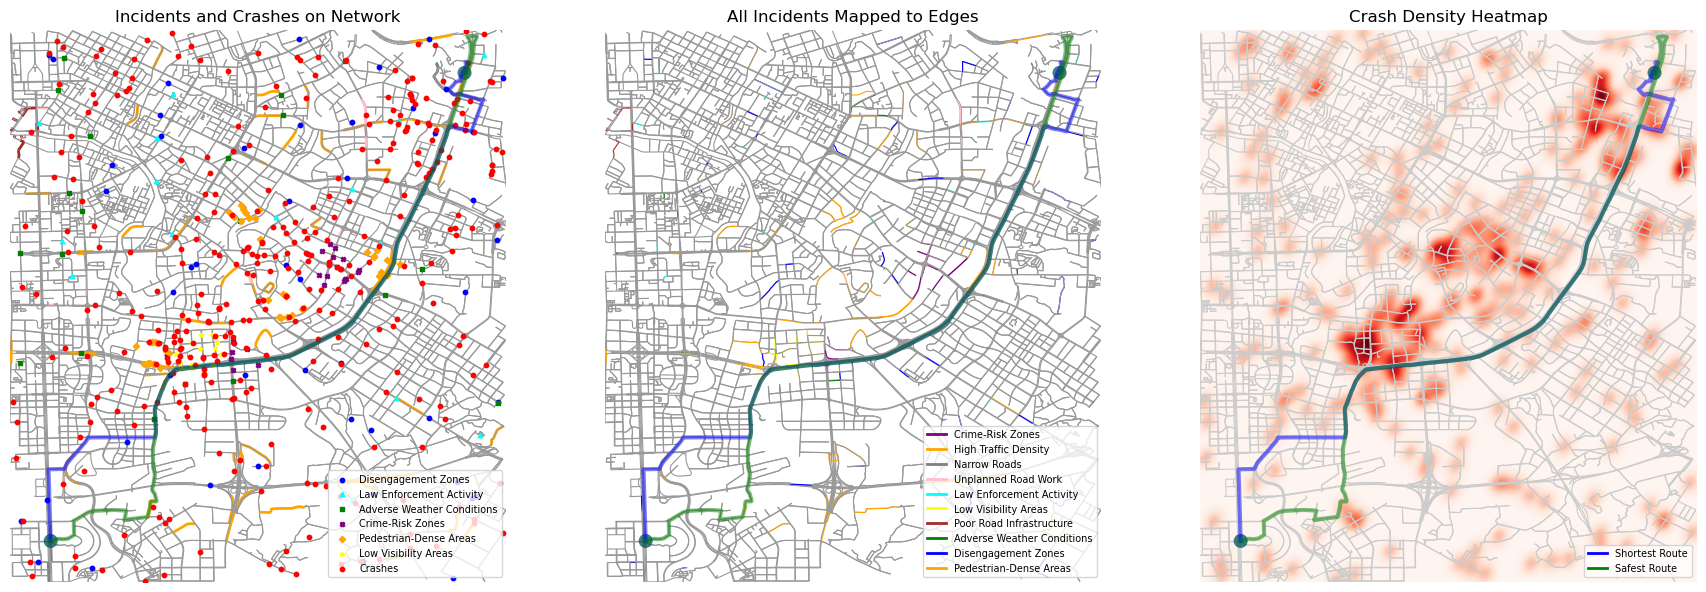

In [87]:
import osmnx as ox
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString
from collections import defaultdict
from scipy.stats import gaussian_kde
import re
np.random.seed(12)

# Define the area of interest using the bounding box (bbox)
bbox = (30.5493864, 104.057658, 30.6724752, 104.1682525)

# Load the street network within the bounding box
G = ox.graph_from_bbox(
    north=bbox[2], south=bbox[0], east=bbox[3], west=bbox[1], network_type='drive'
)

# Define starting and ending points (ensure they're different)
orig_point = (30.5593864, 104.067658)  # Near the bottom-left of bbox
dest_point = (30.6624752, 104.1582525)  # Near the top-right of bbox

# Find the nearest network nodes to the origin and destination points
orig_node = ox.nearest_nodes(G, orig_point[1], orig_point[0])
dest_node = ox.nearest_nodes(G, dest_point[1], dest_point[0])


shortest_route = nx.shortest_path(G, orig_node, dest_node, weight='length')

# ----------------- Crash Data Generation -----------------
# Generate 200 random crash points within the bounding box
num_random_crashes = 200
random_crash_lats = np.random.uniform(bbox[0], bbox[2], num_random_crashes)
random_crash_lons = np.random.uniform(bbox[1], bbox[3], num_random_crashes)
random_crash_points = list(zip(random_crash_lats, random_crash_lons))

# Generate clusters of crash points
cluster_centers = [
    (30.6, 104.1),
    (30.62, 104.12),
    (30.65, 104.15)
]
num_clusters = len(cluster_centers)
points_per_cluster = 50
std_dev = 0.008  # Standard deviation for clusters (~200 meters)
cluster_crash_points = []

for center_lat, center_lon in cluster_centers:
    cluster_lats = np.random.normal(center_lat, std_dev, points_per_cluster)
    cluster_lons = np.random.normal(center_lon, std_dev, points_per_cluster)
    cluster_points = list(zip(cluster_lats, cluster_lons))
    cluster_crash_points.extend(cluster_points)

# Combine random crashes and cluster crashes
crash_points = random_crash_points + cluster_crash_points

# Snap crash points to the nearest edges (but plotted as points)
crash_points_snapped = []
for lat, lon in crash_points:
    nearest_edge = ox.nearest_edges(G, lon, lat)
    u, v, key = nearest_edge
    u_x, u_y = G.nodes[u]['x'], G.nodes[u]['y']
    v_x, v_y = G.nodes[v]['x'], G.nodes[v]['y']
    edge_line = LineString([(u_x, u_y), (v_x, v_y)])
    point = Point(lon, lat)
    snapped_point = edge_line.interpolate(edge_line.project(point))
    crash_points_snapped.append((snapped_point.x, snapped_point.y))

# ----------------- Incident Data Generation -----------------
# Initialize dictionaries to store point and edge incidents
point_incidents = {}
edge_incidents = {}

# Define the incident types, counts, and whether they are point or edge incidents
incidents_info = {
    'Disengagement Zones': {'count': 50, 'type': 'point'},
    'High Traffic Density': {'count': 50, 'type': 'edge'},
    'Law Enforcement Activity': {'count': 15, 'type': 'point'},
    'Adverse Weather Conditions': {'count': 20, 'type': 'point'},
    'Crime-Risk Zones': {'count': 20, 'type': 'point'},
    'Pedestrian-Dense Areas': {'count': 50, 'type': 'point'},
    'Poor Road Infrastructure': {'count': 25, 'type': 'edge'},
    'Unplanned Road Work': {'count': 15, 'type': 'edge'},
    'Low Visibility Areas': {'count': 20, 'type': 'point'},
    'Narrow Roads': {'count': 25, 'type': 'edge'}
}

# Define markers and colors for point incidents
incident_markers = {
    'Disengagement Zones': {'marker': 'o', 'color': 'blue'},
    'Law Enforcement Activity': {'marker': '^', 'color': 'cyan'},
    'Adverse Weather Conditions': {'marker': 's', 'color': 'green'},
    'Crime-Risk Zones': {'marker': 'X', 'color': 'purple'},
    'Pedestrian-Dense Areas': {'marker': 'D', 'color': 'orange'},
    'Low Visibility Areas': {'marker': '*', 'color': 'yellow'}
}

# Define colors for edge incidents
edge_incident_colors = {
    'High Traffic Density': 'orange',
    'Poor Road Infrastructure': 'brown',
    'Unplanned Road Work': 'pink',
    'Narrow Roads': 'gray'
}

# Functions for generating incidents
def generate_incidents_in_areas(area_polygons, count):
    incidents = []
    for _ in range(count):
        polygon = area_polygons[np.random.randint(0, len(area_polygons))]
        minx, miny, maxx, maxy = polygon.bounds
        while True:
            x = np.random.uniform(minx, maxx)
            y = np.random.uniform(miny, maxy)
            point = Point(x, y)
            if polygon.contains(point):
                incidents.append((x, y))
                break
    return incidents

def generate_incidents_near_intersections(G, count):
    intersections = [node for node, degree in G.degree() if degree >= 4]
    incidents = []
    for _ in range(count):
        node = np.random.choice(intersections)
        x, y = G.nodes[node]['x'], G.nodes[node]['y']
        incidents.append((x, y))
    return incidents

def generate_incidents_randomly(G, count):
    incidents = []
    nodes = list(G.nodes)
    for _ in range(count):
        node = np.random.choice(nodes)
        x, y = G.nodes[node]['x'], G.nodes[node]['y']
        incidents.append((x, y))
    return incidents

def edges_in_area(G, area_polygons):
    edges_in_area = []
    for u, v, k, data in G.edges(keys=True, data=True):
        line = LineString([(G.nodes[u]['x'], G.nodes[u]['y']), (G.nodes[v]['x'], G.nodes[v]['y'])])
        for polygon in area_polygons:
            if line.intersects(polygon):
                edges_in_area.append((u, v, k))
                break
    return edges_in_area

def select_long_edges(G):
    return [(u, v, k) for u, v, k, data in G.edges(keys=True, data=True) if data['length'] > 500]

def select_main_edges(G):
    return [(u, v, k) for u, v, k, data in G.edges(keys=True, data=True) if data.get('highway') == 'primary']

def select_narrow_edges(G):
    narrow_edges = []
    for u, v, k, data in G.edges(keys=True, data=True):
        width = data.get('width', '5')
        try:
            width_value = float(re.match(r'^\D*(\d+\.?\d*)', str(width)).group(1))
        except (AttributeError, ValueError):
            width_value = 5
        if width_value < 5:
            narrow_edges.append((u, v, k))
    return narrow_edges

def generate_edge_incidents(G, count, edge_selector):
    selected_edges = edge_selector(G)
    incidents = []
    for _ in range(count):
        edge = selected_edges[np.random.randint(0, len(selected_edges))]
        incidents.append(edge)
    return incidents

# Generate incidents for each type
for incident_type, info in incidents_info.items():
    count = info['count']
    if info['type'] == 'point':
        # Generate point incidents
        if incident_type == 'Disengagement Zones':
            # Generate random points within the network area
            points = []
            for _ in range(count):
                lat = np.random.uniform(bbox[0], bbox[2])
                lon = np.random.uniform(bbox[1], bbox[3])
                points.append((lon, lat))
        elif incident_type == 'Law Enforcement Activity':
            points = generate_incidents_near_intersections(G, count)
        elif incident_type == 'Adverse Weather Conditions':
            points = generate_incidents_randomly(G, count)
        elif incident_type == 'Crime-Risk Zones':
            points = generate_incidents_in_areas(
                [Point(104.11, 30.6).buffer(0.005), Point(104.13, 30.62).buffer(0.005)],
                count
            )
        elif incident_type == 'Pedestrian-Dense Areas':
            # Increase the number of clusters
            area_polygons = [
                Point(104.09, 30.6).buffer(0.004),
                Point(104.12, 30.61).buffer(0.004),
                Point(104.11, 30.63).buffer(0.004),
                Point(104.14, 30.62).buffer(0.004)
            ]
            points = generate_incidents_in_areas(area_polygons, count)
        elif incident_type == 'Low Visibility Areas':
            points = generate_incidents_in_areas(
                [Point(104.1, 30.6).buffer(0.006)],
                count
            )
        else:
            points = generate_incidents_randomly(G, count)
        # Snap points to the nearest edge (but still plotted as points)
        snapped_points = []
        for x, y in points:
            nearest_edge = ox.nearest_edges(G, x, y)
            u, v, key = nearest_edge
            u_x, u_y = G.nodes[u]['x'], G.nodes[u]['y']
            v_x, v_y = G.nodes[v]['x'], G.nodes[v]['y']
            edge_line = LineString([(u_x, u_y), (v_x, v_y)])
            point = Point(x, y)
            snapped_point = edge_line.interpolate(edge_line.project(point))
            snapped_points.append((snapped_point.x, snapped_point.y))
        # Store the snapped points
        point_incidents[incident_type] = snapped_points
    elif info['type'] == 'edge':
        # Generate edge incidents
        if incident_type == 'High Traffic Density':
            edges = generate_edge_incidents(G, count, select_long_edges)
        elif incident_type == 'Poor Road Infrastructure':
            edges = generate_edge_incidents(G, count, lambda G: edges_in_area(G, [Point(104.06, 30.65).buffer(0.005)]))
        elif incident_type == 'Unplanned Road Work':
            edges = generate_edge_incidents(G, count, select_main_edges)
        elif incident_type == 'Narrow Roads':
            edges = generate_edge_incidents(G, count, select_narrow_edges)
        else:
            edges = generate_edge_incidents(G, count, lambda G: list(G.edges(keys=True)))
        # Store the edges
        edge_incidents[incident_type] = edges

# Map incident types to severity levels (for penalizing edges)
severity_mapping = {
    'Disengagement Zones': 10,
    'High Traffic Density': 20,
    'Law Enforcement Activity': 10,
    'Adverse Weather Conditions': 20,
    'Crime-Risk Zones': 30,
    'Pedestrian-Dense Areas': 20,
    'Poor Road Infrastructure': 30,
    'Unplanned Road Work': 20,
    'Low Visibility Areas': 20,
    'Narrow Roads': 10
}

# ----------------- Data Preparation for Plotting and Routing -----------------
# For point incidents
incident_x = {}
incident_y = {}
for incident_type, points in point_incidents.items():
    x_coords = [x for x, y in points]
    y_coords = [y for x, y in points]
    incident_x[incident_type] = x_coords
    incident_y[incident_type] = y_coords

# For edge incidents
edge_incident_mapping = {}
edge_severity = defaultdict(int)
for incident_type, edges in edge_incidents.items():
    severity = severity_mapping[incident_type]
    for edge in edges:
        # Assign incident type based on priority if multiple incidents on the same edge
        if edge not in edge_incident_mapping or severity > severity_mapping[edge_incident_mapping[edge]]:
            edge_incident_mapping[edge] = incident_type
            edge_severity[edge] = severity

# Add cumulative severity to the edges in the graph
for u, v, key in G.edges(keys=True):
    edge = (u, v, key)
    G[u][v][key]['cumulative_severity'] = edge_severity.get(edge, 0)

# Prepare edge colors and widths for plotting (First subplot)
edge_colors_first = []
edge_widths_first = []
for u, v, key in G.edges(keys=True):
    edge = (u, v, key)
    if edge in edge_incident_mapping:
        incident_type = edge_incident_mapping[edge]
        color = edge_incident_colors[incident_type]
        edge_colors_first.append(color)
        edge_widths_first.append(2)
    else:
        edge_colors_first.append('#999999')
        edge_widths_first.append(0.8)

# Prepare edge colors for the second subplot (same thickness)
edge_colors_second = []
for u, v, key in G.edges(keys=True):
    edge = (u, v, key)
    if edge in edge_incident_mapping:
        incident_type = edge_incident_mapping[edge]
        color = edge_incident_colors.get(incident_type, '#999999')
        if incident_type in incident_markers:
            color = incident_markers[incident_type]['color']
        edge_colors_second.append(color)
    else:
        edge_colors_second.append('#999999')

# Compute the safest route by penalizing edges with cumulative severity
penalty_factor = 5  # Adjust this factor to increase or decrease the penalty severity

# Add a new attribute 'safety_weight' to each edge
for u, v, key, data in G.edges(keys=True, data=True):
    severity = data['cumulative_severity']
    # Calculate the safety weight
    data['safety_weight'] = data['length'] * (1 + penalty_factor * severity)

# Compute the safest route using the 'safety_weight' attribute
safest_route = nx.shortest_path(G, orig_node, dest_node, weight='safety_weight')

# ----------------- Visualization -----------------
# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# --- First Subplot: Incidents and Crashes on Network ---
# Plot the street network with edge incidents highlighted
ox.plot_graph(
    G,
    node_size=0,
    edge_color=edge_colors_first,
    edge_linewidth=edge_widths_first,
    bgcolor='white',
    show=False,
    close=False,
    ax=axs[0]
)
# Overlay the shortest route
ox.plot_graph_route(
    G,
    shortest_route,
    route_color='blue',
    route_linewidth=3,
    node_size=0,
    bgcolor=None,
    ax=axs[0],
    show=False,
    close=False
)
# Overlay the safest route
ox.plot_graph_route(
    G,
    safest_route,
    route_color='green',
    route_linewidth=3,
    node_size=0,
    bgcolor=None,
    ax=axs[0],
    show=False,
    close=False
)
# Overlay point incidents
for incident_type, x_coords in incident_x.items():
    y_coords = incident_y[incident_type]
    marker = incident_markers[incident_type]['marker']
    color = incident_markers[incident_type]['color']
    axs[0].scatter(x_coords, y_coords, c=color, s=10, alpha=1, label=incident_type, marker=marker)
# Overlay crash points (crashes are the Y target)
crash_x = [x for x, y in crash_points_snapped]
crash_y = [y for x, y in crash_points_snapped]
axs[0].scatter(crash_x, crash_y, c='red', s=10, alpha=1, label='Crashes', marker='o')
axs[0].set_title("Incidents and Crashes on Network", fontsize=12)
axs[0].legend(loc='lower right', fontsize=7)

# --- Second Subplot: All Incidents Mapped to Edges ---
# Snap all incidents to edges and map them to edges
edge_incident_counts = defaultdict(lambda: defaultdict(int))
for incident_type, points in point_incidents.items():
    for x, y in points:
        nearest_edge = ox.nearest_edges(G, x, y)
        edge_incident_counts[nearest_edge][incident_type] += 1

# For each edge, determine the majority incident type
edge_majority_incident = {}
for edge, incidents in edge_incident_counts.items():
    majority_incident = max(incidents.items(), key=lambda x: x[1])[0]
    edge_majority_incident[edge] = majority_incident

# Combine edge incidents
for edge, incident_type in edge_incident_mapping.items():
    edge_majority_incident[edge] = incident_type

# Prepare edge colors for the second subplot
edge_colors_combined = []
for u, v, key in G.edges(keys=True):
    edge = (u, v, key)
    if edge in edge_majority_incident:
        incident_type = edge_majority_incident[edge]
        if incident_type in incident_markers:
            color = incident_markers[incident_type]['color']
        else:
            color = edge_incident_colors.get(incident_type, '#999999')
        edge_colors_combined.append(color)
    else:
        edge_colors_combined.append('#999999')

# Plot the network with incidents mapped to edges
ox.plot_graph(
    G,
    node_size=0,
    edge_color=edge_colors_combined,
    edge_linewidth=0.8,
    bgcolor='white',
    show=False,
    close=False,
    ax=axs[1]
)
# Plot the shortest route on top
ox.plot_graph_route(
    G,
    shortest_route,
    route_color='blue',
    route_linewidth=3,
    node_size=0,
    bgcolor=None,
    ax=axs[1],
    show=False,
    close=False
)
# Plot the safest route on top
ox.plot_graph_route(
    G,
    safest_route,
    route_color='green',
    route_linewidth=3,
    node_size=0,
    bgcolor=None,
    ax=axs[1],
    show=False,
    close=False
)
axs[1].set_title("All Incidents Mapped to Edges", fontsize=12)

# Create a custom legend
legend_elements = []
for incident_type in set(edge_majority_incident.values()):
    if incident_type in incident_markers:
        color = incident_markers[incident_type]['color']
    else:
        color = edge_incident_colors.get(incident_type, '#999999')
    legend_elements.append(plt.Line2D([0], [0], color=color, lw=2, label=incident_type))
axs[1].legend(handles=legend_elements, loc='lower right', fontsize=7)

# --- Third Subplot: Crash Density Heatmap ---
# Prepare line points for KDE based on crash data
line_points = []
for x, y in crash_points_snapped:
    line_points.append((x, y))

# Apply KDE
if line_points:
    line_points = np.array(line_points).T
    kde = gaussian_kde(line_points, bw_method=0.05)
    x_coords = [G.nodes[node]['x'] for node in G.nodes()]
    y_coords = [G.nodes[node]['y'] for node in G.nodes()]
    x_min, x_max = min(x_coords), max(x_coords)
    y_min, y_max = min(y_coords), max(y_coords)
    x_grid = np.linspace(x_min, x_max, 500)
    y_grid = np.linspace(y_min, y_max, 500)
    X_grid, Y_grid = np.meshgrid(x_grid, y_grid)
    Z = kde(np.vstack([X_grid.ravel(), Y_grid.ravel()])).reshape(X_grid.shape)
else:
    Z = None

# Plot the graph
ox.plot_graph(
    G,
    node_size=0,
    edge_color='#cccccc',
    edge_linewidth=0.8,
    bgcolor='white',
    show=False,
    close=False,
    ax=axs[2]
)
if Z is not None:
    axs[2].imshow(
        np.flipud(Z),
        extent=[x_min, x_max, y_min, y_max],
        cmap='Reds',
        alpha=1
    )
# Plot the shortest route on top
ox.plot_graph_route(
    G,
    shortest_route,
    route_color='blue',
    route_linewidth=3,
    node_size=0,
    bgcolor=None,
    ax=axs[2],
    show=False,
    close=False
)
# Plot the safest route on top
ox.plot_graph_route(
    G,
    safest_route,
    route_color='green',
    route_linewidth=3,
    node_size=0,
    bgcolor=None,
    ax=axs[2],
    show=False,
    close=False
)
axs[2].set_title("Crash Density Heatmap", fontsize=12)
axs[2].legend(handles=[
    plt.Line2D([0], [0], color='blue', lw=2, label='Shortest Route'),
    plt.Line2D([0], [0], color='green', lw=2, label='Safest Route')
], loc='lower right', fontsize=7)

# Set the same x and y limits and aspect ratio for all subplots
for ax in axs:
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_aspect('equal')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [1]:
import osmnx as ox
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString, Polygon
from collections import defaultdict
from scipy.stats import gaussian_kde
import re
np.random.seed(12)

# Define the area of interest using the bounding box (bbox)
bbox = (30.5493864, 104.057658, 30.6724752, 104.1682525)

# Load the street network within the bounding box
G = ox.graph_from_bbox(
    north=bbox[2], south=bbox[0], east=bbox[3], west=bbox[1], network_type='drive'
)

# Define starting and ending points (ensure they're different)
orig_point = (30.5593864, 104.067658)  # Near the bottom-left of bbox
dest_point = (30.6624752, 104.1582525)  # Near the top-right of bbox

# Find the nearest network nodes to the origin and destination points
orig_node = ox.nearest_nodes(G, orig_point[1], orig_point[0])
dest_node = ox.nearest_nodes(G, dest_point[1], dest_point[0])

# Compute the shortest path (without considering incidents)
shortest_route = nx.shortest_path(G, orig_node, dest_node, weight='length')

# ----------------- Crash Data Generation -----------------
# Generate 200 random crash points within the bounding box
num_random_crashes = 200
random_crash_lats = np.random.uniform(bbox[0], bbox[2], num_random_crashes)
random_crash_lons = np.random.uniform(bbox[1], bbox[3], num_random_crashes)
random_crash_points = list(zip(random_crash_lats, random_crash_lons))

# Generate clusters of crash points
cluster_centers = [
    (30.6, 104.1),
    (30.62, 104.12),
    (30.65, 104.15)
]
num_clusters = len(cluster_centers)
points_per_cluster = 50
std_dev = 0.008  # Standard deviation for clusters (~200 meters)
cluster_crash_points = []

for center_lat, center_lon in cluster_centers:
    cluster_lats = np.random.normal(center_lat, std_dev, points_per_cluster)
    cluster_lons = np.random.normal(center_lon, std_dev, points_per_cluster)
    cluster_points = list(zip(cluster_lats, cluster_lons))
    cluster_crash_points.extend(cluster_points)

# Combine random crashes and cluster crashes
crash_points = random_crash_points + cluster_crash_points

# Snap crash points to the nearest edges (but plotted as points)
crash_points_snapped = []
for lat, lon in crash_points:
    nearest_edge = ox.nearest_edges(G, lon, lat)
    u, v, key = nearest_edge
    u_x, u_y = G.nodes[u]['x'], G.nodes[u]['y']
    v_x, v_y = G.nodes[v]['x'], G.nodes[v]['y']
    edge_line = LineString([(u_x, u_y), (v_x, v_y)])
    point = Point(lon, lat)
    snapped_point = edge_line.interpolate(edge_line.project(point))
    crash_points_snapped.append((snapped_point.x, snapped_point.y))

# ----------------- Incident Data Generation -----------------
# Initialize dictionaries to store point and edge incidents
point_incidents = {}
edge_incidents = {}

# Define the incident types, counts, and whether they are point or edge incidents
incidents_info = {
    'Disengagement Zones': {'count': 50, 'type': 'point'},
    'High Traffic Density': {'count': 50, 'type': 'edge'},
    'Law Enforcement Activity': {'count': 15, 'type': 'point'},
    'Adverse Weather Conditions': {'count': 20, 'type': 'point'},
    'Crime-Risk Zones': {'count': 20, 'type': 'point'},
    'Pedestrian-Dense Areas': {'count': 50, 'type': 'point'},
    'Poor Road Infrastructure': {'count': 25, 'type': 'edge'},
    'Unplanned Road Work': {'count': 15, 'type': 'edge'},
    'Low Visibility Areas': {'count': 20, 'type': 'point'},
    'Narrow Roads': {'count': 25, 'type': 'edge'},
    'Crashes': {'count': len(crash_points_snapped), 'type': 'point'}  # Include crashes as incidents
}

# Define markers and colors for point incidents
incident_markers = {
    'Disengagement Zones': {'marker': 'o', 'color': 'blue'},
    'Law Enforcement Activity': {'marker': '^', 'color': 'cyan'},
    'Adverse Weather Conditions': {'marker': 's', 'color': 'green'},
    'Crime-Risk Zones': {'marker': 'X', 'color': 'purple'},
    'Pedestrian-Dense Areas': {'marker': 'D', 'color': 'orange'},
    'Low Visibility Areas': {'marker': '*', 'color': 'yellow'},
    'Crashes': {'marker': 'o', 'color': 'red'}
}

# Define colors for edge incidents
edge_incident_colors = {
    'High Traffic Density': 'orange',
    'Poor Road Infrastructure': 'brown',
    'Unplanned Road Work': 'pink',
    'Narrow Roads': 'gray',
    'Crashes': 'red'  # Crashes have highest priority
}

/var/folders/g5/m5vc66b94_1_h1fx73nwh9jw0000gn/T/ipykernel_62394/3349132205.py:15: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G = ox.graph_from_bbox(
/var/folders/g5/m5vc66b94_1_h1fx73nwh9jw0000gn/T/ipykernel_62394/3349132205.py:15: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = ox.graph_from_bbox(
/opt/anaconda3/lib/python3.12/site-packages/shapely/linear.py:88: RuntimeWarning: invalid value encountered in line_locate_point
  return lib.line_locate_point(line, other)
/opt/anaconda3/lib/python3.12/site-packages/shapely/linear.py:88: RuntimeWarning: invalid value encountered in line_locate_point
  return lib.line_locate_point(line, other)


In [3]:
# Functions for generating incidents
def generate_incidents_in_areas(area_polygons, count):
    incidents = []
    for _ in range(count):
        polygon = area_polygons[np.random.randint(0, len(area_polygons))]
        minx, miny, maxx, maxy = polygon.bounds
        while True:
            x = np.random.uniform(minx, maxx)
            y = np.random.uniform(miny, maxy)
            point = Point(x, y)
            if polygon.contains(point):
                incidents.append((x, y))
                break
    return incidents

def generate_incidents_near_intersections(G, count):
    intersections = [node for node, degree in G.degree() if degree >= 4]
    incidents = []
    for _ in range(count):
        node = np.random.choice(intersections)
        x, y = G.nodes[node]['x'], G.nodes[node]['y']
        incidents.append((x, y))
    return incidents

def generate_incidents_randomly(G, count):
    incidents = []
    nodes = list(G.nodes)
    for _ in range(count):
        node = np.random.choice(nodes)
        x, y = G.nodes[node]['x'], G.nodes[node]['y']
        incidents.append((x, y))
    return incidents

def edges_in_area(G, area_polygons):
    edges_in_area = []
    for u, v, k, data in G.edges(keys=True, data=True):
        line = LineString([(G.nodes[u]['x'], G.nodes[u]['y']), (G.nodes[v]['x'], G.nodes[v]['y'])])
        for polygon in area_polygons:
            if line.intersects(polygon):
                edges_in_area.append((u, v, k))
                break
    return edges_in_area

def select_long_edges(G):
    return [(u, v, k) for u, v, k, data in G.edges(keys=True, data=True) if data['length'] > 500]

def select_main_edges(G):
    return [(u, v, k) for u, v, k, data in G.edges(keys=True, data=True) if data.get('highway') == 'primary']

def select_narrow_edges(G):
    narrow_edges = []
    for u, v, k, data in G.edges(keys=True, data=True):
        width = data.get('width', '5')
        try:
            width_value = float(re.match(r'^\D*(\d+\.?\d*)', str(width)).group(1))
        except (AttributeError, ValueError):
            width_value = 5
        if width_value < 5:
            narrow_edges.append((u, v, k))
    return narrow_edges

def generate_edge_incidents(G, count, edge_selector):
    selected_edges = edge_selector(G)
    incidents = []
    for _ in range(count):
        edge = selected_edges[np.random.randint(0, len(selected_edges))]
        incidents.append(edge)
    return incidents

# Generate incidents for each type
for incident_type, info in incidents_info.items():
    count = info['count']
    if incident_type == 'Crashes':
        # Use crash_points_snapped for crashes
        points = crash_points_snapped
        point_incidents[incident_type] = points
    elif info['type'] == 'point':
        # Generate point incidents
        if incident_type == 'Disengagement Zones':
            # Generate random points within the network area
            points = []
            for _ in range(count):
                lat = np.random.uniform(bbox[0], bbox[2])
                lon = np.random.uniform(bbox[1], bbox[3])
                points.append((lon, lat))
        elif incident_type == 'Law Enforcement Activity':
            points = generate_incidents_near_intersections(G, count)
        elif incident_type == 'Adverse Weather Conditions':
            points = generate_incidents_randomly(G, count)
        elif incident_type == 'Crime-Risk Zones':
            points = generate_incidents_in_areas(
                [Point(104.11, 30.6).buffer(0.005), Point(104.13, 30.62).buffer(0.005)],
                count
            )
        elif incident_type == 'Pedestrian-Dense Areas':
            # Increase the number of clusters
            area_polygons = [
                Point(104.09, 30.6).buffer(0.004),
                Point(104.12, 30.61).buffer(0.004),
                Point(104.11, 30.63).buffer(0.004),
                Point(104.14, 30.62).buffer(0.004)
            ]
            points = generate_incidents_in_areas(area_polygons, count)
        elif incident_type == 'Low Visibility Areas':
            points = generate_incidents_in_areas(
                [Point(104.1, 30.6).buffer(0.006)],
                count
            )
        else:
            points = generate_incidents_randomly(G, count)
        # Snap points to the nearest edge (but still plotted as points)
        snapped_points = []
        for x, y in points:
            nearest_edge = ox.nearest_edges(G, x, y)
            u, v, key = nearest_edge
            u_x, u_y = G.nodes[u]['x'], G.nodes[u]['y']
            v_x, v_y = G.nodes[v]['x'], G.nodes[v]['y']
            edge_line = LineString([(u_x, u_y), (v_x, v_y)])
            point = Point(x, y)
            snapped_point = edge_line.interpolate(edge_line.project(point))
            snapped_points.append((snapped_point.x, snapped_point.y))
        # Store the snapped points
        point_incidents[incident_type] = snapped_points
    elif info['type'] == 'edge':
        # Generate edge incidents
        if incident_type == 'High Traffic Density':
            edges = generate_edge_incidents(G, count, select_long_edges)
        elif incident_type == 'Poor Road Infrastructure':
            edges = generate_edge_incidents(G, count, lambda G: edges_in_area(G, [Point(104.06, 30.65).buffer(0.005)]))
        elif incident_type == 'Unplanned Road Work':
            edges = generate_edge_incidents(G, count, select_main_edges)
        elif incident_type == 'Narrow Roads':
            edges = generate_edge_incidents(G, count, select_narrow_edges)
        else:
            edges = generate_edge_incidents(G, count, lambda G: list(G.edges(keys=True)))
        # Store the edges
        edge_incidents[incident_type] = edges

In [4]:
# Map incident types to severity levels (for penalizing edges)
# Set crash severity to be 5 times the second highest severity (assuming second highest is 30)
severity_mapping = {
    'Disengagement Zones': 10,
    'High Traffic Density': 20,
    'Law Enforcement Activity': 10,
    'Adverse Weather Conditions': 20,
    'Crime-Risk Zones': 30,
    'Pedestrian-Dense Areas': 20,
    'Poor Road Infrastructure': 30,
    'Unplanned Road Work': 20,
    'Low Visibility Areas': 20,
    'Narrow Roads': 10,
    'Crashes': 150  # Crash severity is 5x the second highest (30)
}

# ----------------- Data Preparation for Plotting and Routing -----------------
# For point incidents
incident_x = {}
incident_y = {}
for incident_type, points in point_incidents.items():
    x_coords = [x for x, y in points]
    y_coords = [y for x, y in points]
    incident_x[incident_type] = x_coords
    incident_y[incident_type] = y_coords

# For edge incidents
edge_incident_mapping = {}
edge_severity = defaultdict(int)
# Map edge incidents
for incident_type, edges in edge_incidents.items():
    severity = severity_mapping[incident_type]
    for edge in edges:
        # Assign incident type based on priority if multiple incidents on the same edge
        if edge not in edge_incident_mapping or severity > severity_mapping[edge_incident_mapping[edge]]:
            edge_incident_mapping[edge] = incident_type
            edge_severity[edge] = severity

In [5]:
# Map point incidents to edges for severity calculation
for incident_type, points in point_incidents.items():
    severity = severity_mapping[incident_type]
    for x, y in points:
        nearest_edge = ox.nearest_edges(G, x, y)
        edge = nearest_edge
        if edge not in edge_incident_mapping or severity > severity_mapping[edge_incident_mapping[edge]]:
            edge_incident_mapping[edge] = incident_type
            edge_severity[edge] = severity

# Add cumulative severity to the edges in the graph
for u, v, key in G.edges(keys=True):
    edge = (u, v, key)
    G[u][v][key]['cumulative_severity'] = edge_severity.get(edge, 0)

# Prepare edge colors and widths for plotting (First subplot)
edge_colors_first = []
edge_widths_first = []
for u, v, key in G.edges(keys=True):
    edge = (u, v, key)
    if edge in edge_incident_mapping:
        incident_type = edge_incident_mapping[edge]
        if incident_type in edge_incident_colors:
            color = edge_incident_colors[incident_type]
        else:
            color = incident_markers[incident_type]['color']
        edge_colors_first.append(color)
        edge_widths_first.append(2)
    else:
        edge_colors_first.append('#999999')
        edge_widths_first.append(0.8)

# Compute the safest route by penalizing edges with cumulative severity
penalty_factor = 5  # Adjust this factor to increase or decrease the penalty severity

# Add a new attribute 'safety_weight' to each edge
for u, v, key, data in G.edges(keys=True, data=True):
    severity = data['cumulative_severity']
    # Calculate the safety weight
    data['safety_weight'] = data['length'] * (1 + penalty_factor * severity)

In [6]:
# Compute the safest route using the 'safety_weight' attribute
safest_route = nx.shortest_path(G, orig_node, dest_node, weight='safety_weight')

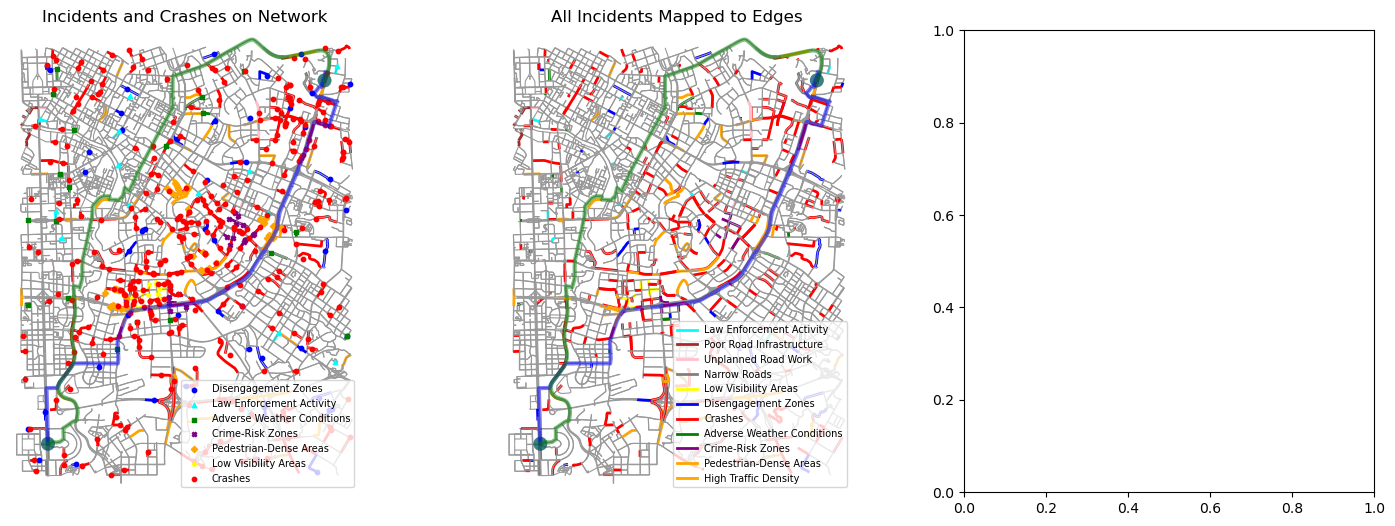

In [7]:
# ----------------- Visualization -----------------
# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# --- First Subplot: Incidents and Crashes on Network ---
# Plot the street network with edge incidents highlighted
ox.plot_graph(
    G,
    node_size=0,
    edge_color=edge_colors_first,
    edge_linewidth=edge_widths_first,
    bgcolor='white',
    show=False,
    close=False,
    ax=axs[0]
)
# Overlay the shortest route
ox.plot_graph_route(
    G,
    shortest_route,
    route_color='blue',
    route_linewidth=3,
    node_size=0,
    bgcolor=None,
    ax=axs[0],
    show=False,
    close=False
)
# Overlay the safest route
ox.plot_graph_route(
    G,
    safest_route,
    route_color='green',
    route_linewidth=3,
    node_size=0,
    bgcolor=None,
    ax=axs[0],
    show=False,
    close=False
)
# Overlay point incidents
for incident_type, x_coords in incident_x.items():
    y_coords = incident_y[incident_type]
    marker = incident_markers[incident_type]['marker']
    color = incident_markers[incident_type]['color']
    axs[0].scatter(x_coords, y_coords, c=color, s=10, alpha=1, label=incident_type, marker=marker)
axs[0].set_title("Incidents and Crashes on Network", fontsize=12)
axs[0].legend(loc='lower right', fontsize=7)

# --- Second Subplot: All Incidents Mapped to Edges ---
# Prepare edge colors for the second subplot
edge_colors_second = []
edge_widths_second = []
for u, v, key in G.edges(keys=True):
    edge = (u, v, key)
    if edge in edge_incident_mapping:
        incident_type = edge_incident_mapping[edge]
        if incident_type in incident_markers:
            color = incident_markers[incident_type]['color']
        else:
            color = edge_incident_colors.get(incident_type, '#999999')
        edge_colors_second.append(color)
        edge_widths_second.append(2)
    else:
        edge_colors_second.append('#999999')
        edge_widths_second.append(0.8)

# Plot the network with incidents mapped to edges
ox.plot_graph(
    G,
    node_size=0,
    edge_color=edge_colors_second,
    edge_linewidth=edge_widths_second,
    bgcolor='white',
    show=False,
    close=False,
    ax=axs[1]
)
# Plot the shortest route on top
ox.plot_graph_route(
    G,
    shortest_route,
    route_color='blue',
    route_linewidth=3,
    node_size=0,
    bgcolor=None,
    ax=axs[1],
    show=False,
    close=False
)
# Plot the safest route on top
ox.plot_graph_route(
    G,
    safest_route,
    route_color='green',
    route_linewidth=3,
    node_size=0,
    bgcolor=None,
    ax=axs[1],
    show=False,
    close=False
)
axs[1].set_title("All Incidents Mapped to Edges", fontsize=12)

# Create a custom legend
legend_elements = []
for incident_type in set(edge_incident_mapping.values()):
    if incident_type in incident_markers:K
        color = incident_markers[incident_type]['color']
    else:
        color = edge_incident_colors.get(incident_type, '#999999')
    legend_elements.append(plt.Line2D([0], [0], color=color, lw=2, label=incident_type))
axs[1].legend(handles=legend_elements, loc='lower right', fontsize=7)

plt.show()

In [9]:
import osmnx as ox
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from fastkde import fastKDE  # Use fastkde for faster KDE calculation

# Prepare line points for KDE based on severity (optimized)
line_points = []
weights = []

# Vectorized line points generation
for u, v, key, data in G.edges(keys=True, data=True):
    severity = data['cumulative_severity']
    if severity > 0:
        x_start, y_start = G.nodes[u]['x'], G.nodes[u]['y']
        x_end, y_end = G.nodes[v]['x'], G.nodes[v]['y']
        num_points = max(int(data['length'] / 10), 2)
        
        # Generate line points vectorized
        x_vals = np.linspace(x_start, x_end, num_points)
        y_vals = np.linspace(y_start, y_end, num_points)
        
        # Append to line points and weights
        line_points.extend(list(zip(x_vals, y_vals)))
        weights.extend([severity] * num_points)

# Convert line points and weights to NumPy arrays
line_points = np.array(line_points).T
weights = np.array(weights)

# Apply KDE using fastkde
if line_points.size > 0:
    x_min, x_max = line_points[0].min(), line_points[0].max()
    y_min, y_max = line_points[1].min(), line_points[1].max()
    
    # Define grid resolution
    x_grid = np.linspace(x_min, x_max, 500)
    y_grid = np.linspace(y_min, y_max, 500)

    # Apply fastKDE
    density, X_grid, Y_grid = fastKDE.fastKDE(line_points[0], line_points[1], gridsize=(500, 500), weights=weights)

    # Reshape to grid
    Z = density.reshape(X_grid.shape)
else:
    Z = None

# Plot the graph
fig, ax = plt.subplots(figsize=(8, 6))
ox.plot_graph(
    G,
    node_size=0,
    edge_color='#cccccc',
    edge_linewidth=0.8,
    bgcolor='white',
    show=False,
    close=False,
    ax=ax
)

# Overlay KDE heatmap
if Z is not None:
    ax.imshow(
        np.flipud(Z),
        extent=[x_min, x_max, y_min, y_max],
        cmap='Reds',
        alpha=0.6
    )

# Plot the shortest and safest routes
ox.plot_graph_route(
    G,
    shortest_route,
    route_color='blue',
    route_linewidth=3,
    node_size=0,
    bgcolor=None,
    ax=ax,
    show=False,
    close=False
)
ox.plot_graph_route(
    G,
    safest_route,
    route_color='green',
    route_linewidth=3,
    node_size=0,
    bgcolor=None,
    ax=ax,
    show=False,
    close=False
)

ax.set_title("Incident Severity Heatmap", fontsize=12)
ax.legend(handles=[
    plt.Line2D([0], [0], color='blue', lw=2, label='Shortest Route'),
    plt.Line2D([0], [0], color='green', lw=2, label='Safest Route')
], loc='lower right', fontsize=7)

# Adjust layout and show the plot
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_aspect('equal')
plt.tight_layout()
plt.show()


TypeError: fastKDE.__init__() got an unexpected keyword argument 'gridsize'

In [11]:
import osmnx as ox
import numpy as np
import matplotlib.pyplot as plt
from fastkde import fastKDE  # Use fastkde for faster KDE calculation

# Prepare line points for KDE based on severity (optimized)
line_points = []
weights = []

# Vectorized line points generation
for u, v, key, data in G.edges(keys=True, data=True):
    severity = data['cumulative_severity']
    if severity > 0:
        x_start, y_start = G.nodes[u]['x'], G.nodes[u]['y']
        x_end, y_end = G.nodes[v]['x'], G.nodes[v]['y']
        num_points = max(int(data['length'] / 10), 2)
        
        # Generate line points vectorized
        x_vals = np.linspace(x_start, x_end, num_points)
        y_vals = np.linspace(y_start, y_end, num_points)
        
        # Append to line points and weights
        line_points.extend(list(zip(x_vals, y_vals)))
        weights.extend([severity] * num_points)

# Convert line points and weights to NumPy arrays
line_points = np.array(line_points).T
weights = np.array(weights)

# Apply KDE using fastKDE
if line_points.size > 0:
    x_min, x_max = line_points[0].min(), line_points[0].max()
    y_min, y_max = line_points[1].min(), line_points[1].max()

    # Apply fastKDE
    density, X, Y = fastKDE.fastKDE(line_points[0], line_points[1], weights=weights)

    # Reshape to grid
    Z = density.reshape(X.shape)
else:
    Z = None

# Plot the graph
fig, ax = plt.subplots(figsize=(8, 6))
ox.plot_graph(
    G,
    node_size=0,
    edge_color='#cccccc',
    edge_linewidth=0.8,
    bgcolor='white',
    show=False,
    close=False,
    ax=ax
)

# Overlay KDE heatmap
if Z is not None:
    ax.imshow(
        np.flipud(Z),
        extent=[x_min, x_max, y_min, y_max],
        cmap='Reds',
        alpha=0.6
    )

# Plot the shortest and safest routes
ox.plot_graph_route(
    G,
    shortest_route,
    route_color='blue',
    route_linewidth=3,
    node_size=0,
    bgcolor=None,
    ax=ax,
    show=False,
    close=False
)
ox.plot_graph_route(
    G,
    safest_route,
    route_color='green',
    route_linewidth=3,
    node_size=0,
    bgcolor=None,
    ax=ax,
    show=False,
    close=False
)

ax.set_title("Incident Severity Heatmap", fontsize=12)
ax.legend(handles=[
    plt.Line2D([0], [0], color='blue', lw=2, label='Shortest Route'),
    plt.Line2D([0], [0], color='green', lw=2, label='Safest Route')
], loc='lower right', fontsize=7)

# Adjust layout and show the plot
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_aspect('equal')
plt.tight_layout()
plt.show()


TypeError: fastKDE.__init__() got an unexpected keyword argument 'weights'

In [ ]:
# --- Third Subplot: Incident Severity Heatmap ---
# Prepare line points for KDE based on severity
line_points = []
for u, v, key, data in G.edges(keys=True, data=True):
    severity = data['cumulative_severity']
    if severity > 0:
        x_start, y_start = G.nodes[u]['x'], G.nodes[u]['y']
        x_end, y_end = G.nodes[v]['x'], G.nodes[v]['y']
        num_points = max(int(data['length'] / 10), 2)
        x_vals = np.linspace(x_start, x_end, num_points)
        y_vals = np.linspace(y_start, y_end, num_points)
        # Add points multiple times based on severity
        for _ in range(severity):
            line_points.extend([(x, y) for x, y in zip(x_vals, y_vals)])

# Apply KDE
if line_points:
    line_points = np.array(line_points).T
    kde = gaussian_kde(line_points, bw_method=0.05)
    x_coords = [G.nodes[node]['x'] for node in G.nodes()]
    y_coords = [G.nodes[node]['y'] for node in G.nodes()]
    x_min, x_max = min(x_coords), max(x_coords)
    y_min, y_max = min(y_coords), max(y_coords)
    x_grid = np.linspace(x_min, x_max, 500)
    y_grid = np.linspace(y_min, y_max, 500)
    X_grid, Y_grid = np.meshgrid(x_grid, y_grid)
    Z = kde(np.vstack([X_grid.ravel(), Y_grid.ravel()])).reshape(X_grid.shape)
else:
    Z = None

# Plot the graph
ox.plot_graph(
    G,
    node_size=0,
    edge_color='#cccccc',
    edge_linewidth=0.8,
    bgcolor='white',
    show=False,
    close=False,
    ax=axs[2]
)
if Z is not None:
    axs[2].imshow(
        np.flipud(Z),
        extent=[x_min, x_max, y_min, y_max],
        cmap='Reds',
        alpha=1
    )
# Plot the shortest route on top
ox.plot_graph_route(
    G,
    shortest_route,
    route_color='blue',
    route_linewidth=3,
    node_size=0,
    bgcolor=None,
    ax=axs[2],
    show=False,
    close=False
)
# Plot the safest route on top
ox.plot_graph_route(
    G,
    safest_route,
    route_color='green',
    route_linewidth=3,
    node_size=0,
    bgcolor=None,
    ax=axs[2],
    show=False,
    close=False
)
axs[2].set_title("Incident Severity Heatmap", fontsize=12)
axs[2].legend(handles=[
    plt.Line2D([0], [0], color='blue', lw=2, label='Shortest Route'),
    plt.Line2D([0], [0], color='green', lw=2, label='Safest Route')
], loc='lower right', fontsize=7)

# Set the same x and y limits and aspect ratio for all subplots
for ax in axs:
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_aspect('equal')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [13]:
import osmnx as ox
import numpy as np
import matplotlib.pyplot as plt
from fastkde import fastKDE  # Import fastKDE for faster KDE calculation

# Prepare line points for KDE based on severity (optimized)
line_points = []

# Vectorized line points generation
for u, v, key, data in G.edges(keys=True, data=True):
    severity = data['cumulative_severity']
    if severity > 0:
        x_start, y_start = G.nodes[u]['x'], G.nodes[u]['y']
        x_end, y_end = G.nodes[v]['x'], G.nodes[v]['y']
        num_points = max(int(data['length'] / 10), 2)
        
        # Generate line points vectorized
        x_vals = np.linspace(x_start, x_end, num_points)
        y_vals = np.linspace(y_start, y_end, num_points)
        
        # Replicate points based on severity
        for _ in range(severity):
            line_points.extend(list(zip(x_vals, y_vals)))

# Convert line points to NumPy arrays
line_points = np.array(line_points).T

# Apply KDE using fastKDE
if line_points.size > 0:
    x_min, x_max = line_points[0].min(), line_points[0].max()
    y_min, y_max = line_points[1].min(), line_points[1].max()

    # Apply fastKDE
    density, X, Y = fastKDE.fastKDE(line_points[0], line_points[1])

    # Reshape to grid
    Z = density.reshape(X.shape)
else:
    Z = None

# Plot the graph
fig, ax = plt.subplots(figsize=(8, 6))
ox.plot_graph(
    G,
    node_size=0,
    edge_color='#cccccc',
    edge_linewidth=0.8,
    bgcolor='white',
    show=False,
    close=False,
    ax=ax
)

# Overlay KDE heatmap
if Z is not None:
    ax.imshow(
        np.flipud(Z),
        extent=[x_min, x_max, y_min, y_max],
        cmap='Reds',
        alpha=0.6
    )

# Plot the shortest and safest routes
ox.plot_graph_route(
    G,
    shortest_route,
    route_color='blue',
    route_linewidth=3,
    node_size=0,
    bgcolor=None,
    ax=ax,
    show=False,
    close=False
)
ox.plot_graph_route(
    G,
    safest_route,
    route_color='green',
    route_linewidth=3,
    node_size=0,
    bgcolor=None,
    ax=ax,
    show=False,
    close=False
)

ax.set_title("Incident Severity Heatmap", fontsize=12)
ax.legend(handles=[
    plt.Line2D([0], [0], color='blue', lw=2, label='Shortest Route'),
    plt.Line2D([0], [0], color='green', lw=2, label='Safest Route')
], loc='lower right', fontsize=7)

# Adjust layout and show the plot
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_aspect('equal')
plt.tight_layout()
plt.show()


TypeError: object of type 'numpy.float64' has no len()

In [14]:
import osmnx as ox
import numpy as np
import matplotlib.pyplot as plt
from fastkde import fastKDE  # Import fastKDE for faster KDE calculation

# Prepare line points for KDE based on severity (optimized)
line_points = []

# Vectorized line points generation
for u, v, key, data in G.edges(keys=True, data=True):
    severity = data['cumulative_severity']
    if severity > 0:
        x_start, y_start = G.nodes[u]['x'], G.nodes[u]['y']
        x_end, y_end = G.nodes[v]['x'], G.nodes[v]['y']
        num_points = max(int(data['length'] / 10), 2)
        
        # Generate line points vectorized
        x_vals = np.linspace(x_start, x_end, num_points)
        y_vals = np.linspace(y_start, y_end, num_points)
        
        # Replicate points based on severity
        for _ in range(severity):
            line_points.extend(list(zip(x_vals, y_vals)))

# Convert line points to NumPy arrays
line_points = np.array(line_points).T

# Apply KDE using fastKDE
if line_points.size > 0:
    x_min, x_max = line_points[0].min(), line_points[0].max()
    y_min, y_max = line_points[1].min(), line_points[1].max()

    # Apply fastKDE
    density, x_axis, y_axis = fastKDE.fastKDE(line_points[0], line_points[1])

    # Create a meshgrid for the density plot
    X, Y = np.meshgrid(x_axis, y_axis)
else:
    density, X, Y = None, None, None

# Plot the graph
fig, ax = plt.subplots(figsize=(8, 6))
ox.plot_graph(
    G,
    node_size=0,
    edge_color='#cccccc',
    edge_linewidth=0.8,
    bgcolor='white',
    show=False,
    close=False,
    ax=ax
)

# Overlay KDE heatmap
if density is not None:
    ax.imshow(
        np.flipud(density),
        extent=[x_min, x_max, y_min, y_max],
        cmap='Reds',
        alpha=0.6
    )

# Plot the shortest and safest routes
ox.plot_graph_route(
    G,
    shortest_route,
    route_color='blue',
    route_linewidth=3,
    node_size=0,
    bgcolor=None,
    ax=ax,
    show=False,
    close=False
)
ox.plot_graph_route(
    G,
    safest_route,
    route_color='green',
    route_linewidth=3,
    node_size=0,
    bgcolor=None,
    ax=ax,
    show=False,
    close=False
)

ax.set_title("Incident Severity Heatmap", fontsize=12)
ax.legend(handles=[
    plt.Line2D([0], [0], color='blue', lw=2, label='Shortest Route'),
    plt.Line2D([0], [0], color='green', lw=2, label='Safest Route')
], loc='lower right', fontsize=7)

# Adjust layout and show the plot
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_aspect('equal')
plt.tight_layout()
plt.show()


TypeError: object of type 'numpy.float64' has no len()

/var/folders/g5/m5vc66b94_1_h1fx73nwh9jw0000gn/T/ipykernel_62394/3012289950.py:15: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G = ox.graph_from_bbox(
/var/folders/g5/m5vc66b94_1_h1fx73nwh9jw0000gn/T/ipykernel_62394/3012289950.py:15: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = ox.graph_from_bbox(
/opt/anaconda3/lib/python3.12/site-packages/shapely/linear.py:88: RuntimeWarning: invalid value encountered in line_locate_point
  return lib.line_locate_point(line, other)
/opt/anaconda3/lib/python3.12/site-packages/shapely/linear.py:88: RuntimeWarning: invalid value encountered in line_locate_point
  return lib.line_locate_point(line, other)


TypeError: fastKDE.__init__() got an unexpected keyword argument 'weights'

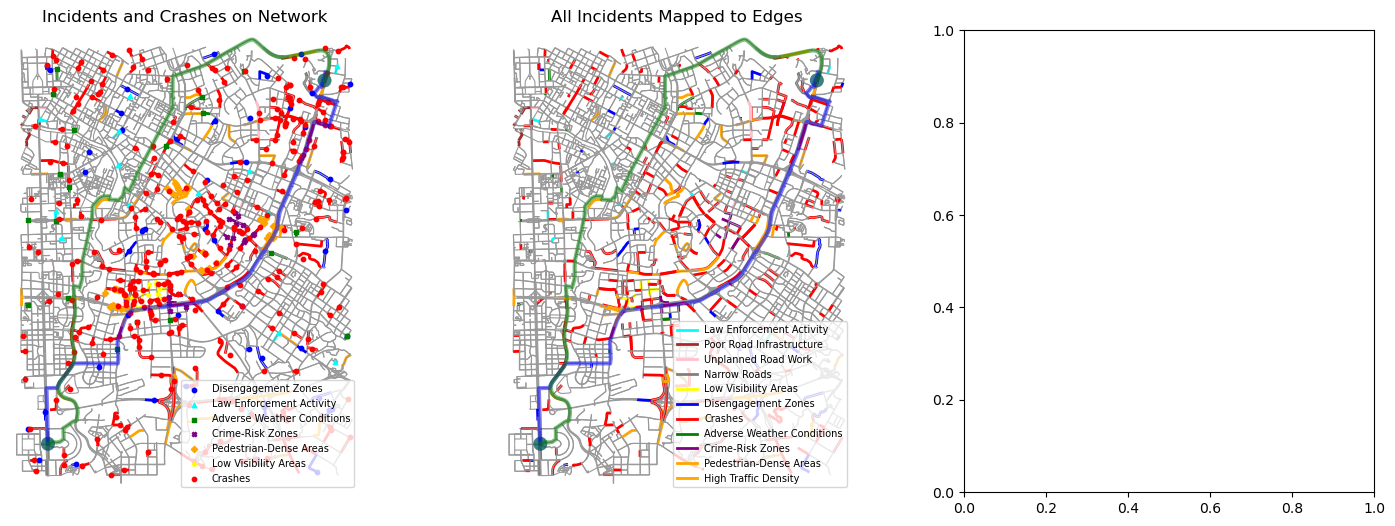

In [29]:
import osmnx as ox
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString, Polygon
from collections import defaultdict
from fastkde import fastKDE  # Import fastKDE
import re
np.random.seed(12)

# Define the area of interest using the bounding box (bbox)
bbox = (30.5493864, 104.057658, 30.6724752, 104.1682525)

# Load the street network within the bounding box
G = ox.graph_from_bbox(
    north=bbox[2], south=bbox[0], east=bbox[3], west=bbox[1], network_type='drive'
)

# Define starting and ending points (ensure they're different)
orig_point = (30.5593864, 104.067658)  # Near the bottom-left of bbox
dest_point = (30.6624752, 104.1582525)  # Near the top-right of bbox

# Find the nearest network nodes to the origin and destination points
orig_node = ox.nearest_nodes(G, orig_point[1], orig_point[0])
dest_node = ox.nearest_nodes(G, dest_point[1], dest_point[0])

# Compute the shortest path (without considering incidents)
if orig_node != dest_node:
    shortest_route = nx.shortest_path(G, orig_node, dest_node, weight='length')

    # ----------------- Crash Data Generation -----------------
    # Generate 200 random crash points within the bounding box
    num_random_crashes = 200
    random_crash_lats = np.random.uniform(bbox[0], bbox[2], num_random_crashes)
    random_crash_lons = np.random.uniform(bbox[1], bbox[3], num_random_crashes)
    random_crash_points = list(zip(random_crash_lats, random_crash_lons))

    # Generate clusters of crash points
    cluster_centers = [
        (30.6, 104.1),
        (30.62, 104.12),
        (30.65, 104.15)
    ]
    num_clusters = len(cluster_centers)
    points_per_cluster = 50
    std_dev = 0.008  # Standard deviation for clusters (~200 meters)
    cluster_crash_points = []

    for center_lat, center_lon in cluster_centers:
        cluster_lats = np.random.normal(center_lat, std_dev, points_per_cluster)
        cluster_lons = np.random.normal(center_lon, std_dev, points_per_cluster)
        cluster_points = list(zip(cluster_lats, cluster_lons))
        cluster_crash_points.extend(cluster_points)

    # Combine random crashes and cluster crashes
    crash_points = random_crash_points + cluster_crash_points

    # Snap crash points to the nearest edges (but plotted as points)
    crash_points_snapped = []
    for lat, lon in crash_points:
        nearest_edge = ox.nearest_edges(G, lon, lat)
        u, v, key = nearest_edge
        u_x, u_y = G.nodes[u]['x'], G.nodes[u]['y']
        v_x, v_y = G.nodes[v]['x'], G.nodes[v]['y']
        edge_line = LineString([(u_x, u_y), (v_x, v_y)])
        point = Point(lon, lat)
        snapped_point = edge_line.interpolate(edge_line.project(point))
        crash_points_snapped.append((snapped_point.x, snapped_point.y))

    # ----------------- Incident Data Generation -----------------
    # Initialize dictionaries to store point and edge incidents
    point_incidents = {}
    edge_incidents = {}

    # Define the incident types, counts, and whether they are point or edge incidents
    incidents_info = {
        'Disengagement Zones': {'count': 50, 'type': 'point'},
        'High Traffic Density': {'count': 50, 'type': 'edge'},
        'Law Enforcement Activity': {'count': 15, 'type': 'point'},
        'Adverse Weather Conditions': {'count': 20, 'type': 'point'},
        'Crime-Risk Zones': {'count': 20, 'type': 'point'},
        'Pedestrian-Dense Areas': {'count': 50, 'type': 'point'},
        'Poor Road Infrastructure': {'count': 25, 'type': 'edge'},
        'Unplanned Road Work': {'count': 15, 'type': 'edge'},
        'Low Visibility Areas': {'count': 20, 'type': 'point'},
        'Narrow Roads': {'count': 25, 'type': 'edge'},
        'Crashes': {'count': len(crash_points_snapped), 'type': 'point'}  # Include crashes as incidents
    }

    # Define markers and colors for point incidents
    incident_markers = {
        'Disengagement Zones': {'marker': 'o', 'color': 'blue'},
        'Law Enforcement Activity': {'marker': '^', 'color': 'cyan'},
        'Adverse Weather Conditions': {'marker': 's', 'color': 'green'},
        'Crime-Risk Zones': {'marker': 'X', 'color': 'purple'},
        'Pedestrian-Dense Areas': {'marker': 'D', 'color': 'orange'},
        'Low Visibility Areas': {'marker': '*', 'color': 'yellow'},
        'Crashes': {'marker': 'o', 'color': 'red'}
    }

    # Define colors for edge incidents
    edge_incident_colors = {
        'High Traffic Density': 'orange',
        'Poor Road Infrastructure': 'brown',
        'Unplanned Road Work': 'pink',
        'Narrow Roads': 'gray',
        'Crashes': 'red'  # Crashes have highest priority
    }

    # Functions for generating incidents
    def generate_incidents_in_areas(area_polygons, count):
        incidents = []
        for _ in range(count):
            polygon = area_polygons[np.random.randint(0, len(area_polygons))]
            minx, miny, maxx, maxy = polygon.bounds
            while True:
                x = np.random.uniform(minx, maxx)
                y = np.random.uniform(miny, maxy)
                point = Point(x, y)
                if polygon.contains(point):
                    incidents.append((x, y))
                    break
        return incidents

    def generate_incidents_near_intersections(G, count):
        intersections = [node for node, degree in G.degree() if degree >= 4]
        incidents = []
        for _ in range(count):
            node = np.random.choice(intersections)
            x, y = G.nodes[node]['x'], G.nodes[node]['y']
            incidents.append((x, y))
        return incidents

    def generate_incidents_randomly(G, count):
        incidents = []
        nodes = list(G.nodes)
        for _ in range(count):
            node = np.random.choice(nodes)
            x, y = G.nodes[node]['x'], G.nodes[node]['y']
            incidents.append((x, y))
        return incidents

    def edges_in_area(G, area_polygons):
        edges_in_area = []
        for u, v, k, data in G.edges(keys=True, data=True):
            line = LineString([(G.nodes[u]['x'], G.nodes[u]['y']), (G.nodes[v]['x'], G.nodes[v]['y'])])
            for polygon in area_polygons:
                if line.intersects(polygon):
                    edges_in_area.append((u, v, k))
                    break
        return edges_in_area

    def select_long_edges(G):
        return [(u, v, k) for u, v, k, data in G.edges(keys=True, data=True) if data['length'] > 500]

    def select_main_edges(G):
        return [(u, v, k) for u, v, k, data in G.edges(keys=True, data=True) if data.get('highway') == 'primary']

    def select_narrow_edges(G):
        narrow_edges = []
        for u, v, k, data in G.edges(keys=True, data=True):
            width = data.get('width', '5')
            try:
                width_value = float(re.match(r'^\D*(\d+\.?\d*)', str(width)).group(1))
            except (AttributeError, ValueError):
                width_value = 5
            if width_value < 5:
                narrow_edges.append((u, v, k))
        return narrow_edges

    def generate_edge_incidents(G, count, edge_selector):
        selected_edges = edge_selector(G)
        incidents = []
        for _ in range(count):
            edge = selected_edges[np.random.randint(0, len(selected_edges))]
            incidents.append(edge)
        return incidents

    # Generate incidents for each type
    for incident_type, info in incidents_info.items():
        count = info['count']
        if incident_type == 'Crashes':
            # Use crash_points_snapped for crashes
            points = crash_points_snapped
            point_incidents[incident_type] = points
        elif info['type'] == 'point':
            # Generate point incidents
            if incident_type == 'Disengagement Zones':
                # Generate random points within the network area
                points = []
                for _ in range(count):
                    lat = np.random.uniform(bbox[0], bbox[2])
                    lon = np.random.uniform(bbox[1], bbox[3])
                    points.append((lon, lat))
            elif incident_type == 'Law Enforcement Activity':
                points = generate_incidents_near_intersections(G, count)
            elif incident_type == 'Adverse Weather Conditions':
                points = generate_incidents_randomly(G, count)
            elif incident_type == 'Crime-Risk Zones':
                points = generate_incidents_in_areas(
                    [Point(104.11, 30.6).buffer(0.005), Point(104.13, 30.62).buffer(0.005)],
                    count
                )
            elif incident_type == 'Pedestrian-Dense Areas':
                # Increase the number of clusters
                area_polygons = [
                    Point(104.09, 30.6).buffer(0.004),
                    Point(104.12, 30.61).buffer(0.004),
                    Point(104.11, 30.63).buffer(0.004),
                    Point(104.14, 30.62).buffer(0.004)
                ]
                points = generate_incidents_in_areas(area_polygons, count)
            elif incident_type == 'Low Visibility Areas':
                points = generate_incidents_in_areas(
                    [Point(104.1, 30.6).buffer(0.006)],
                    count
                )
            else:
                points = generate_incidents_randomly(G, count)
            # Snap points to the nearest edge (but still plotted as points)
            snapped_points = []
            for x, y in points:
                nearest_edge = ox.nearest_edges(G, x, y)
                u, v, key = nearest_edge
                u_x, u_y = G.nodes[u]['x'], G.nodes[u]['y']
                v_x, v_y = G.nodes[v]['x'], G.nodes[v]['y']
                edge_line = LineString([(u_x, u_y), (v_x, v_y)])
                point = Point(x, y)
                snapped_point = edge_line.interpolate(edge_line.project(point))
                snapped_points.append((snapped_point.x, snapped_point.y))
            # Store the snapped points
            point_incidents[incident_type] = snapped_points
        elif info['type'] == 'edge':
            # Generate edge incidents
            if incident_type == 'High Traffic Density':
                edges = generate_edge_incidents(G, count, select_long_edges)
            elif incident_type == 'Poor Road Infrastructure':
                edges = generate_edge_incidents(G, count, lambda G: edges_in_area(G, [Point(104.06, 30.65).buffer(0.005)]))
            elif incident_type == 'Unplanned Road Work':
                edges = generate_edge_incidents(G, count, select_main_edges)
            elif incident_type == 'Narrow Roads':
                edges = generate_edge_incidents(G, count, select_narrow_edges)
            else:
                edges = generate_edge_incidents(G, count, lambda G: list(G.edges(keys=True)))
            # Store the edges
            edge_incidents[incident_type] = edges

    # Map incident types to severity levels (for penalizing edges)
    # Set crash severity to be 5 times the second highest severity (assuming second highest is 30)
    severity_mapping = {
        'Disengagement Zones': 10,
        'High Traffic Density': 20,
        'Law Enforcement Activity': 10,
        'Adverse Weather Conditions': 20,
        'Crime-Risk Zones': 30,
        'Pedestrian-Dense Areas': 20,
        'Poor Road Infrastructure': 30,
        'Unplanned Road Work': 20,
        'Low Visibility Areas': 20,
        'Narrow Roads': 10,
        'Crashes': 150  # Crash severity is 5x the second highest (30)
    }

    # ----------------- Data Preparation for Plotting and Routing -----------------
    # For point incidents
    incident_x = {}
    incident_y = {}
    for incident_type, points in point_incidents.items():
        x_coords = [x for x, y in points]
        y_coords = [y for x, y in points]
        incident_x[incident_type] = x_coords
        incident_y[incident_type] = y_coords

    # For edge incidents
    edge_incident_mapping = {}
    edge_severity = defaultdict(int)
    # Map edge incidents
    for incident_type, edges in edge_incidents.items():
        severity = severity_mapping[incident_type]
        for edge in edges:
            # Assign incident type based on priority if multiple incidents on the same edge
            if edge not in edge_incident_mapping or severity > severity_mapping[edge_incident_mapping[edge]]:
                edge_incident_mapping[edge] = incident_type
                edge_severity[edge] = severity

    # Map point incidents to edges for severity calculation
    for incident_type, points in point_incidents.items():
        severity = severity_mapping[incident_type]
        for x, y in points:
            nearest_edge = ox.nearest_edges(G, x, y)
            edge = nearest_edge
            if edge not in edge_incident_mapping or severity > severity_mapping[edge_incident_mapping[edge]]:
                edge_incident_mapping[edge] = incident_type
                edge_severity[edge] = severity

    # Add cumulative severity to the edges in the graph
    for u, v, key in G.edges(keys=True):
        edge = (u, v, key)
        G[u][v][key]['cumulative_severity'] = edge_severity.get(edge, 0)

    # Prepare edge colors and widths for plotting (First subplot)
    edge_colors_first = []
    edge_widths_first = []
    for u, v, key in G.edges(keys=True):
        edge = (u, v, key)
        if edge in edge_incident_mapping:
            incident_type = edge_incident_mapping[edge]
            if incident_type in edge_incident_colors:
                color = edge_incident_colors[incident_type]
            else:
                color = incident_markers[incident_type]['color']
            edge_colors_first.append(color)
            edge_widths_first.append(2)
        else:
            edge_colors_first.append('#999999')
            edge_widths_first.append(0.8)

    # Compute the safest route by penalizing edges with cumulative severity
    penalty_factor = 5  # Adjust this factor to increase or decrease the penalty severity

    # Add a new attribute 'safety_weight' to each edge
    for u, v, key, data in G.edges(keys=True, data=True):
        severity = data['cumulative_severity']
        # Calculate the safety weight
        data['safety_weight'] = data['length'] * (1 + penalty_factor * severity)

    # Compute the safest route using the 'safety_weight' attribute
    safest_route = nx.shortest_path(G, orig_node, dest_node, weight='safety_weight')

    # ----------------- Visualization -----------------
    # Create a figure with 3 subplots
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    # --- First Subplot: Incidents and Crashes on Network ---
    # Plot the street network with edge incidents highlighted
    ox.plot_graph(
        G,
        node_size=0,
        edge_color=edge_colors_first,
        edge_linewidth=edge_widths_first,
        bgcolor='white',
        show=False,
        close=False,
        ax=axs[0]
    )
    # Overlay the shortest route
    ox.plot_graph_route(
        G,
        shortest_route,
        route_color='blue',
        route_linewidth=3,
        node_size=0,
        bgcolor=None,
        ax=axs[0],
        show=False,
        close=False
    )
    # Overlay the safest route
    ox.plot_graph_route(
        G,
        safest_route,
        route_color='green',
        route_linewidth=3,
        node_size=0,
        bgcolor=None,
        ax=axs[0],
        show=False,
        close=False
    )
    # Overlay point incidents
    for incident_type, x_coords in incident_x.items():
        y_coords = incident_y[incident_type]
        marker = incident_markers[incident_type]['marker']
        color = incident_markers[incident_type]['color']
        axs[0].scatter(x_coords, y_coords, c=color, s=10, alpha=1, label=incident_type, marker=marker)
    axs[0].set_title("Incidents and Crashes on Network", fontsize=12)
    axs[0].legend(loc='lower right', fontsize=7)

    # --- Second Subplot: All Incidents Mapped to Edges ---
    # Prepare edge colors for the second subplot
    edge_colors_second = []
    edge_widths_second = []
    for u, v, key in G.edges(keys=True):
        edge = (u, v, key)
        if edge in edge_incident_mapping:
            incident_type = edge_incident_mapping[edge]
            if incident_type in incident_markers:
                color = incident_markers[incident_type]['color']
            else:
                color = edge_incident_colors.get(incident_type, '#999999')
            edge_colors_second.append(color)
            edge_widths_second.append(2)
        else:
            edge_colors_second.append('#999999')
            edge_widths_second.append(0.8)

    # Plot the network with incidents mapped to edges
    ox.plot_graph(
        G,
        node_size=0,
        edge_color=edge_colors_second,
        edge_linewidth=edge_widths_second,
        bgcolor='white',
        show=False,
        close=False,
        ax=axs[1]
    )
    # Plot the shortest route on top
    ox.plot_graph_route(
        G,
        shortest_route,
        route_color='blue',
        route_linewidth=3,
        node_size=0,
        bgcolor=None,
        ax=axs[1],
        show=False,
        close=False
    )
    # Plot the safest route on top
    ox.plot_graph_route(
        G,
        safest_route,
        route_color='green',
        route_linewidth=3,
        node_size=0,
        bgcolor=None,
        ax=axs[1],
        show=False,
        close=False
    )
    axs[1].set_title("All Incidents Mapped to Edges", fontsize=12)

    # Create a custom legend
    legend_elements = []
    for incident_type in set(edge_incident_mapping.values()):
        if incident_type in incident_markers:
            color = incident_markers[incident_type]['color']
        else:
            color = edge_incident_colors.get(incident_type, '#999999')
        legend_elements.append(plt.Line2D([0], [0], color=color, lw=2, label=incident_type))
    axs[1].legend(handles=legend_elements, loc='lower right', fontsize=7)

    # --- Third Subplot: Incident Severity Heatmap using fastKDE ---
    # Prepare line points for KDE based on severity
    line_points = []
    weights = []
    for u, v, key, data in G.edges(keys=True, data=True):
        severity = data['cumulative_severity']
        if severity > 0:
            x_start, y_start = G.nodes[u]['x'], G.nodes[u]['y']
            x_end, y_end = G.nodes[v]['x'], G.nodes[v]['y']
            num_points = max(int(data['length'] / 10), 2)
            x_vals = np.linspace(x_start, x_end, num_points)
            y_vals = np.linspace(y_start, y_end, num_points)
            line_points.extend(zip(x_vals, y_vals))
            weights.extend([severity] * len(x_vals))

    # Apply fastKDE
    if line_points:
        line_points = np.array(line_points)
        xData = line_points[:, 0]
        yData = line_points[:, 1]
        weights = np.array(weights)
        myPDF, axes = fastKDE.pdf(xData, yData, weights=weights)
        x_grid = axes[0]
        y_grid = axes[1]
        Z = myPDF.T  # Transpose for correct orientation
        x_min, x_max = x_grid.min(), x_grid.max()
        y_min, y_max = y_grid.min(), y_grid.max()
    else:
        Z = None

    # Plot the graph
    ox.plot_graph(
        G,
        node_size=0,
        edge_color='#cccccc',
        edge_linewidth=0.8,
        bgcolor='white',
        show=False,
        close=False,
        ax=axs[2]
    )
    if Z is not None:
        extent = [x_min, x_max, y_min, y_max]
        axs[2].imshow(
            Z,
            extent=extent,
            origin='lower',
            cmap='Reds',
            alpha=1,
            aspect='auto'
        )
    # Plot the shortest route on top
    ox.plot_graph_route(
        G,
        shortest_route,
        route_color='blue',
        route_linewidth=3,
        node_size=0,
        bgcolor=None,
        ax=axs[2],
        show=False,
        close=False
    )
    # Plot the safest route on top
    ox.plot_graph_route(
        G,
        safest_route,
        route_color='green',
        route_linewidth=3,
        node_size=0,
        bgcolor=None,
        ax=axs[2],
        show=False,
        close=False
    )
    axs[2].set_title("Incident Severity Heatmap", fontsize=12)
    axs[2].legend(handles=[
        plt.Line2D([0], [0], color='blue', lw=2, label='Shortest Route'),
        plt.Line2D([0], [0], color='green', lw=2, label='Safest Route')
    ], loc='lower right', fontsize=7)

    # Set the same x and y limits and aspect ratio for all subplots
    for ax in axs:
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_aspect('equal')

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

else:
    print("Origin and destination nodes are the same; please choose different coordinates.")


In [31]:
import numpy as np
import fastkde
import matplotlib.pyplot as plt

# Replicate xData and yData based on weights
xData_replicated = np.repeat(xData, weights)
yData_replicated = np.repeat(yData, weights)

# Calculate the KDE
pdf = fastkde.pdf(xData_replicated, yData_replicated, numPoints=512)

# # Create a meshgrid for the PDF
# X, Y = np.meshgrid(x_axis, y_axis)

# # Plot the KDE
# fig, ax = plt.subplots(figsize=(8, 6))
# c = ax.contourf(X, Y, PDF, cmap='Reds')
# plt.colorbar(c, ax=ax)
# ax.set_title("Weighted Kernel Density Estimate")
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# plt.show()
pdf.plot()

TypeError: fastKDE.__init__() got an unexpected keyword argument 'numPoints'

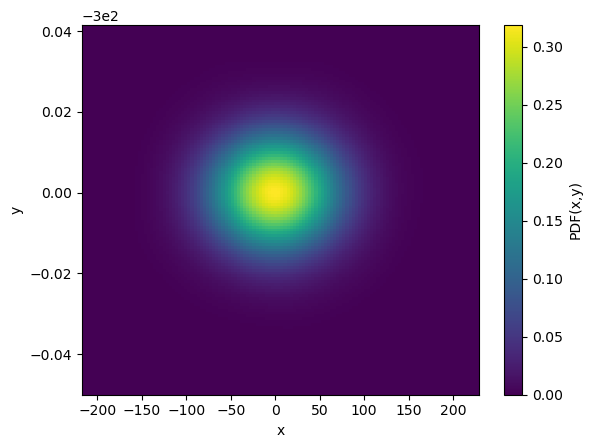

In [24]:
""" Demonstrate the first README example. """
import numpy as np
import fastkde
import matplotlib.pyplot as plt

#Generate two random variables dataset (representing 100,000 pairs of datapoints)
N = int(1e5)
x = 50*np.random.normal(size=N) + 0.1
y = 0.01*np.random.normal(size=N) - 300

#Do the self-consistent density estimate
PDF = fastkde.pdf(x, y, var_names = ['x', 'y'])

PDF.plot();